# 📦 Required Modules Installation  
Before running this notebook, ensure all dependencies are installed.

**Recommended:** Use the provided `requirements.txt` for a full environment setup:
```bash
pip install -r requirements.txt

# Data Collection

In [2]:
import pandas as pd
import numpy as np

# raw csv github link
url = 'https://raw.githubusercontent.com/ravsssh/UAS-Machine-Learning/refs/heads/main/CUSTOMER%20CHURN%20TELCO(in).csv'
df = pd.read_csv(url)

In [3]:
# setup pandas display
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows', 80)
pd.set_option('display.min_rows', 80)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# fix incorrect data types
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['tenure'] = df['tenure'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# check data quality
def check_data_quality(df, target_column='Churn'):
    has_missing_values = df.isnull().values.any()
    missing_counts = df.isnull().sum()
    duplicate_rows = df.duplicated().sum()
    class_distribution = df[target_column].value_counts()
    class_distribution_pct = df[target_column].value_counts(normalize=True)
    
    print("\nIs there missing values:")
    print(has_missing_values)
    if has_missing_values:
        print("\nMissing values by column:")
        print(missing_counts[missing_counts > 0])
    
    print("\nDuplicate Rows:")
    print(duplicate_rows)
    
    print(f"\nClass Distribution ({target_column}):")
    print(class_distribution)
    print(class_distribution_pct)
    
    return {
        'has_missing_values': has_missing_values,
        'missing_counts': missing_counts,
        'duplicate_rows': duplicate_rows,
        'class_distribution': class_distribution,
        'class_distribution_pct': class_distribution_pct
    }

check_data_quality(df)


Is there missing values:
False

Duplicate Rows:
0

Class Distribution (Churn):
Churn
False    5174
True     1869
Name: count, dtype: int64
Churn
False    0.73463
True     0.26537
Name: proportion, dtype: float64


{'has_missing_values': np.False_,
 'missing_counts': customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 'duplicate_rows': np.int64(0),
 'class_distribution': Churn
 False    5174
 True     1869
 Name: count, dtype: int64,
 'class_distribution_pct': Churn
 False    0.73463
 True     0.26537
 Name: proportion, dtype: float64}

In [7]:
unique_values = df.nunique()
print("\nUnique values per column:")
print(unique_values)


Unique values per column:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
# multiple categorical columns to check
multiple_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                 'StreamingTV','StreamingMovies', 'Contract', 'PaymentMethod']

service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

customer_profile_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

payment_cols = ['Contract','PaymentMethod', 'PaperlessBilling']


for column in multiple_cols:
    if column in df.columns:
        print(f"\n{column} - Unique Values:")
        value_counts = df[column].value_counts().reset_index()
        value_counts.columns = [column, 'Count']
        value_counts['Percentage'] = (value_counts['Count'] / len(df) * 100).round(1)
        value_counts['Percentage'] = value_counts['Percentage'].astype(str) + '%'
        print(value_counts)        


MultipleLines - Unique Values:
      MultipleLines  Count Percentage
0                No   3390      48.1%
1               Yes   2971      42.2%
2  No phone service    682       9.7%

InternetService - Unique Values:
  InternetService  Count Percentage
0     Fiber optic   3096      44.0%
1             DSL   2421      34.4%
2              No   1526      21.7%

OnlineSecurity - Unique Values:
        OnlineSecurity  Count Percentage
0                   No   3498      49.7%
1                  Yes   2019      28.7%
2  No internet service   1526      21.7%

OnlineBackup - Unique Values:
          OnlineBackup  Count Percentage
0                   No   3088      43.8%
1                  Yes   2429      34.5%
2  No internet service   1526      21.7%

DeviceProtection - Unique Values:
      DeviceProtection  Count Percentage
0                   No   3095      43.9%
1                  Yes   2422      34.4%
2  No internet service   1526      21.7%

TechSupport - Unique Values:
           TechSu

In [9]:
for column in customer_profile_cols:
    if column in df.columns:
        print(f"\n{column} - Unique Values:")
        value_counts = df[column].value_counts().reset_index()
        value_counts.columns = [column, 'Count']
        value_counts['Percentage'] = (value_counts['Count'] / len(df) * 100).round(1)
        value_counts['Percentage'] = value_counts['Percentage'].astype(str) + '%'
        print(value_counts)
    else:
        print(f"\n❌ Column '{column}' not found in the dataset")


gender - Unique Values:
   gender  Count Percentage
0    Male   3555      50.5%
1  Female   3488      49.5%

SeniorCitizen - Unique Values:
   SeniorCitizen  Count Percentage
0          False   5901      83.8%
1           True   1142      16.2%

Partner - Unique Values:
  Partner  Count Percentage
0      No   3641      51.7%
1     Yes   3402      48.3%

Dependents - Unique Values:
  Dependents  Count Percentage
0         No   4933      70.0%
1        Yes   2110      30.0%


In [10]:
for column in payment_cols:
    if column in df.columns:
        print(f"\n{column} - Unique Values:")
        value_counts = df[column].value_counts().reset_index()
        value_counts.columns = [column, 'Count']
        value_counts['Percentage'] = (value_counts['Count'] / len(df) * 100).round(1)
        value_counts['Percentage'] = value_counts['Percentage'].astype(str) + '%'
        print(value_counts)
    else:
        print(f"\n❌ Column '{column}' not found in the dataset")


Contract - Unique Values:
         Contract  Count Percentage
0  Month-to-month   3875      55.0%
1        Two year   1695      24.1%
2        One year   1473      20.9%

PaymentMethod - Unique Values:
               PaymentMethod  Count Percentage
0           Electronic check   2365      33.6%
1               Mailed check   1612      22.9%
2  Bank transfer (automatic)   1544      21.9%
3    Credit card (automatic)   1522      21.6%

PaperlessBilling - Unique Values:
  PaperlessBilling  Count Percentage
0              Yes   4171      59.2%
1               No   2872      40.8%


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches 

COLORS = {
    'palette': ['#f9dce7', '#f099b2', '#df525a', '#d23841', '#5d1824', '#260213'],
    'churn_yes': '#5d1824',
    'churn_no': '#d23841',
    'primary': '#d23841', 
    'secondary': '#5d1824',
    'light': '#f9dce7',  
    'medium': '#f099b2',
    'dark': '#260213'      
}

def setup_churn_style():
    plt.style.use('default')
    sns.set_style("ticks", {
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'palette': COLORS['palette']
    })
    plt.rcParams.update({
        'font.family': 'Gill Sans',
        'font.size': 12,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'figure.titlesize': 18,
        'axes.titleweight': 'bold'
    })

setup_churn_style()

def datalabel_bar(ax, fontsize=12):
    rects = [rect for rect in ax.get_children() 
      if isinstance(rect, mpatches.Rectangle)]
    
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.annotate(f"{height:.0f}", xy=(rect.get_x() + rect.get_width() / 2, height), 
                xytext=(0, 3),
                textcoords="offset points",
                ha="center", va="bottom", fontsize=fontsize)

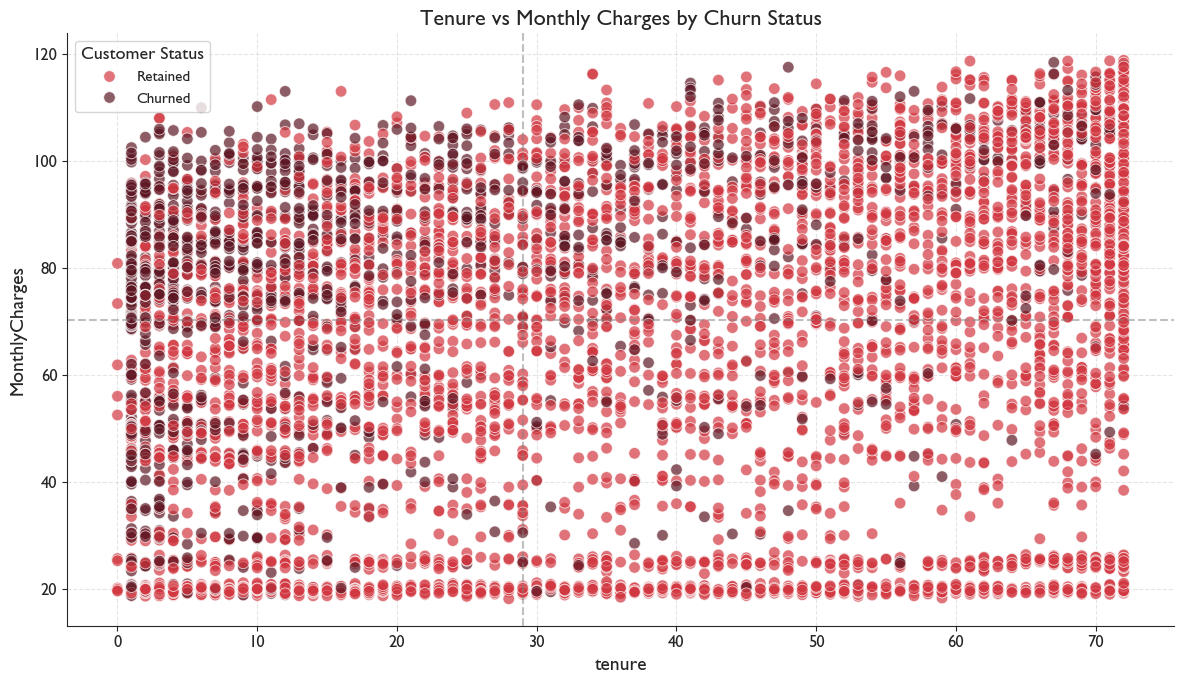

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(12, 7))
sns.scatterplot(
    data=df, 
    x='tenure', 
    y='MonthlyCharges', 
    hue='Churn',
    palette={True: COLORS['churn_yes'], False: COLORS['churn_no']},
    alpha=0.7,
    s=70,
    ax=axes
)

axes.set_title('Tenure vs Monthly Charges by Churn Status')
axes.grid(linestyle='--', alpha=0.5)

legend = axes.legend(title='Customer Status', title_fontsize='13', fontsize='11', loc='best')
legend.get_texts()[0].set_text('Retained')
legend.get_texts()[1].set_text('Churned') 


median_tenure = df['tenure'].median()
median_charges = df['MonthlyCharges'].median()

axes.axvline(median_tenure, color='gray', linestyle='--', alpha=0.5)
axes.axhline(median_charges, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

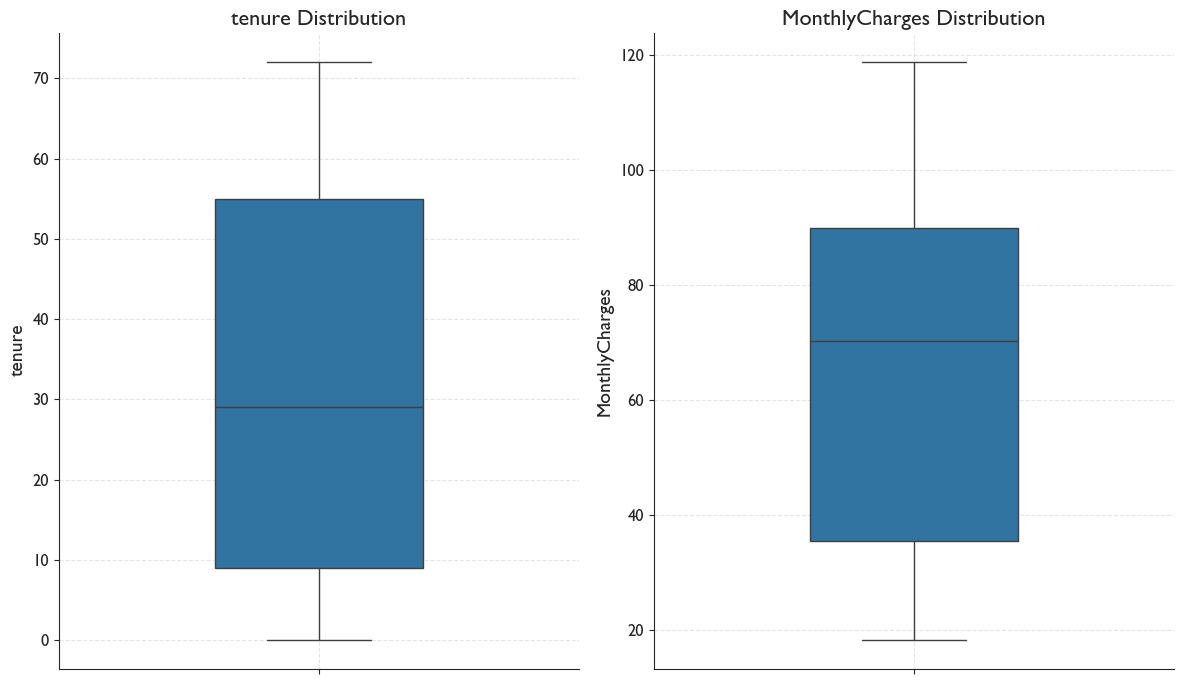

In [13]:
numerical_cols = ['tenure', 'MonthlyCharges']

fig, axes = plt.subplots(1, 2, figsize=(12, 7))
for i, col in enumerate(numerical_cols):
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        width=0.4,
    )
    axes[i].set_title(f'{col} Distribution')
    axes[i].grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

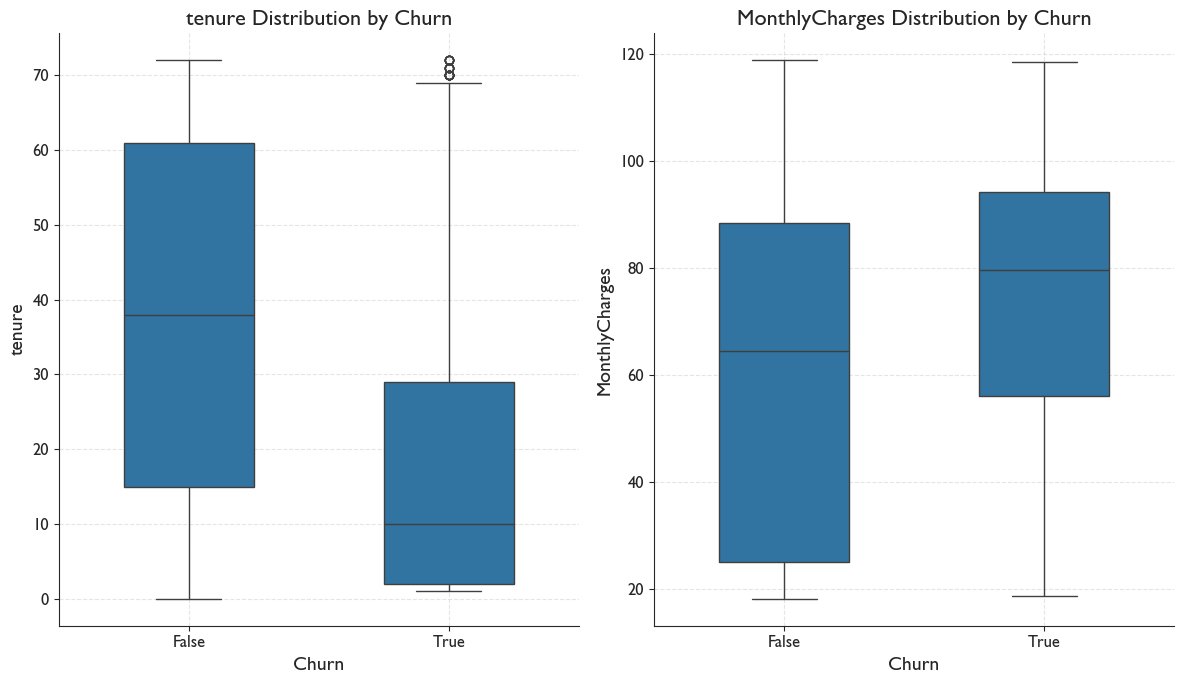

In [14]:
numerical_cols = ['tenure', 'MonthlyCharges']

fig, axes = plt.subplots(1, 2, figsize=(12, 7))

for i, col in enumerate(numerical_cols):
    sns.boxplot(
        x="Churn",     
        y=col,
        data=df,
        ax=axes[i],
        width=0.5,
    )
    axes[i].set_title(f'{col} Distribution by Churn')
    axes[i].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [15]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Outliers for {column}:")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    return lower_bound, upper_bound

detect_outliers_iqr(df, 'tenure')
detect_outliers_iqr(df, 'MonthlyCharges')

Outliers for tenure:
Lower Bound: -60.0, Upper Bound: 124.0
Outliers for MonthlyCharges:
Lower Bound: -46.02499999999999, Upper Bound: 171.375


(np.float64(-46.02499999999999), np.float64(171.375))

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [17]:
from scipy import stats

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    
    outlier_mask = z_scores > threshold
    outliers = data[outlier_mask]
    outlier_indices = data.index[outlier_mask]
    
    return {
        'outliers': outliers,
        'outlier_indices': outlier_indices,
        'z_scores': z_scores,
        'threshold': threshold,
        'num_outliers': len(outliers)
    }

outlier_results = detect_outliers_zscore(df['tenure'], threshold=3)
print(f"Z-Score Method (threshold=3):")
print(f"Number of outliers: {outlier_results['num_outliers']}")
print(f"Outlier values: {outlier_results['outliers'].values}")
print(f"Outlier indices: {outlier_results['outlier_indices'].tolist()}")

outlier_results_sensitive = detect_outliers_zscore(df['tenure'], threshold=2)
print(f"\nZ-Score Method (threshold=2 - more sensitive):")
print(f"Number of outliers: {outlier_results_sensitive['num_outliers']}")


def detect_outliers_modified_zscore(data, threshold=3.5):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    
    # Find outliers
    outlier_mask = np.abs(modified_z_scores) > threshold
    outliers = data[outlier_mask]
    outlier_indices = data.index[outlier_mask]
    
    return {
        'outliers': outliers,
        'outlier_indices': outlier_indices,
        'modified_z_scores': modified_z_scores,
        'threshold': threshold,
        'num_outliers': len(outliers),
        'median': median,
        'mad': mad
    }

modified_outlier_results = detect_outliers_modified_zscore(df['tenure'], threshold=3.5)

print(f"\nModified Z-Score Method (threshold=3.5):")
print(f"Number of outliers: {modified_outlier_results['num_outliers']}")
print(f"Median: {modified_outlier_results['median']:.2f}")
print(f"MAD: {modified_outlier_results['mad']:.2f}")

print(f"\n=== COMPARISON ===")
print(f"IQR Method: Use your existing code")
print(f"Z-Score (threshold=3): {outlier_results['num_outliers']} outliers")
print(f"Z-Score (threshold=2): {outlier_results_sensitive['num_outliers']} outliers")
print(f"Modified Z-Score: {modified_outlier_results['num_outliers']} outliers")

Z-Score Method (threshold=3):
Number of outliers: 0
Outlier values: []
Outlier indices: []

Z-Score Method (threshold=2 - more sensitive):
Number of outliers: 0

Modified Z-Score Method (threshold=3.5):
Number of outliers: 0
Median: 29.00
MAD: 22.00

=== COMPARISON ===
IQR Method: Use your existing code
Z-Score (threshold=3): 0 outliers
Z-Score (threshold=2): 0 outliers
Modified Z-Score: 0 outliers


In [18]:
from sklearn.preprocessing import OneHotEncoder

def encode_dataframe(df, binary_mappings, multiple_cols):    
    df_encoded = df.copy()

    for col, mapping in binary_mappings.items():
        if col in df_encoded.columns:
            df_encoded[col] = df_encoded[col].map(mapping).astype(float)

    if "SeniorCitizen" in df_encoded.columns:
        df_encoded["SeniorCitizen"] = df_encoded["SeniorCitizen"].astype(float)
    if "Churn" in df_encoded.columns:
        df_encoded["Churn"] = df_encoded["Churn"].map({"No": 0, "Yes": 1}).astype(float) \
            if df_encoded["Churn"].dtype == "object" else df_encoded["Churn"].astype(float)

    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    one_hot_encoded = encoder.fit_transform(df_encoded[multiple_cols])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(multiple_cols), index=df_encoded.index)
    
    df_encoded = pd.concat([df_encoded, one_hot_df], axis=1)
    df_encoded = df_encoded.drop(multiple_cols, axis=1)
    return df_encoded

In [19]:
binary_mappings = {
    'gender': {'Male': 0, 'Female': 1},
    'Partner': {'No': 0, 'Yes': 1},
    'Dependents': {'No': 0, 'Yes': 1},
    'PhoneService': {'No': 0, 'Yes': 1},
    'PaperlessBilling': {'No': 0, 'Yes': 1}
}

df_encoded = encode_dataframe(df, binary_mappings, multiple_cols)


In [20]:
df_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1.0,0.0,1.0,0.0,1,0.0,1.0,29.85,29.85,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,0.0,0.0,0.0,0.0,34,1.0,0.0,56.95,1889.50,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,0.0,0.0,0.0,0.0,2,1.0,1.0,53.85,108.15,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,0.0,0.0,0.0,0.0,45,0.0,0.0,42.30,1840.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,1.0,0.0,0.0,0.0,2,1.0,1.0,70.70,151.65,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   float64
 2   SeniorCitizen                            7043 non-null   float64
 3   Partner                                  7043 non-null   float64
 4   Dependents                               7043 non-null   float64
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   float64
 7   PaperlessBilling                         7043 non-null   float64
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

In [22]:
import itertools

service_cols_encoded = [
    'PhoneService','MultipleLines_Yes','InternetService_DSL','InternetService_Fiber optic',
    'OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes',
    'TechSupport_Yes','StreamingTV_Yes','StreamingMovies_Yes'
]

df_encoded['ServiceUsageScore'] = df_encoded[service_cols_encoded].sum(axis=1)

usage_churn = (
    df_encoded.groupby('ServiceUsageScore')['Churn']
    .agg(['count', 'sum', 'mean'])
    .rename(columns={'count': 'Total Customers', 'sum': 'Customer Churned', 'mean': 'Churn Rate'})
)
usage_churn['Churn %'] = (usage_churn['Churn Rate'] * 100).round(1).astype(str) + '%'
usage_churn['Customer %'] = (usage_churn['Total Customers'] / usage_churn['Total Customers'].sum() * 100).round(1).astype(str) + '%'
usage_churn = usage_churn.drop(columns='Churn Rate')

print("\nChurn distribution by number of services used:")
print(usage_churn)



Churn distribution by number of services used:
                   Total Customers  Customer Churned Churn % Customer %
ServiceUsageScore                                                      
1.0                           1264             138.0   10.9%      17.9%
2.0                            859             266.0   31.0%      12.2%
3.0                            846             380.0   44.9%      12.0%
4.0                            965             352.0   36.5%      13.7%
5.0                            922             289.0   31.3%      13.1%
6.0                            908             232.0   25.6%      12.9%
7.0                            676             152.0   22.5%       9.6%
8.0                            395              49.0   12.4%       5.6%
9.0                            208              11.0    5.3%       3.0%


In [23]:
def service_distribution_by_usage(score):
    subset = df_encoded[df_encoded['ServiceUsageScore'] == score]
    if subset.empty:
        return None
    
    service_counts = subset[service_cols_encoded].sum().sort_values(ascending=False).reset_index()
    service_counts.columns = ['Service', 'Count']
    service_counts['Percentage'] = (service_counts['Count'] / len(subset) * 100).round(1).astype(str) + '%'
    
    churn_rate = subset['Churn'].mean()
    
    return service_counts, churn_rate

def common_service_combinations(df, service_cols, usage_score):
    subset = df[df['ServiceUsageScore'] == usage_score]
    if subset.empty:
        return None

    combos = subset[service_cols].apply(
        lambda row: tuple(sorted([s for s in service_cols if row[s] == 1])), axis=1
    )

    combo_stats = (
        subset.assign(ServiceCombination=combos)
        .groupby('ServiceCombination')['Churn']
        .agg(Total_Customers='count', Churned_Customers='sum', Churn_Rate='mean')
        .reset_index()
    )

    combo_stats['Service Combination'] = combo_stats['ServiceCombination'].apply(lambda x: ", ".join(x))
    combo_stats = combo_stats.drop(columns='ServiceCombination')
    combo_stats['Share %'] = (combo_stats['Total_Customers'] / len(subset) * 100).round(1).astype(str) + '%'
    combo_stats['Churned_Customers'] = combo_stats['Churned_Customers'].astype(int)
    combo_stats['Churn %'] = (combo_stats['Churn_Rate'] * 100).round(1).astype(str) + '%'
    combo_stats = combo_stats.drop(columns='Churn_Rate')

    return combo_stats[['Service Combination', 'Total_Customers', 'Churned_Customers', 'Share %', 'Churn %']]

# def common_service_combinations(df, service_cols, usage_score):
#     subset = df[df['ServiceUsageScore'] == usage_score]
#     if subset.empty:
#         return None
    
#     combos = subset[service_cols].apply(
#         lambda row: tuple(sorted([s for s in service_cols if row[s] == 1])), axis=1
#     )

#     combo_counts = combos.value_counts().reset_index()
#     combo_counts.columns = ['Service Combination', 'Count']
#     combo_counts['Service Combination'] = combo_counts['Service Combination'].apply(lambda x: ", ".join(x))
#     combo_counts['Percentage'] = (combo_counts['Count'] / len(subset) * 100).round(1).astype(str) + '%'
    
#     return combo_counts

In [24]:
for usage_score in range(1, 10):
    result = service_distribution_by_usage(usage_score)
    if result is None:
        continue

    service_dist, churn_rate = result
    print(f"\n=== ServiceUsageScore = {usage_score} ===")
    print(service_dist.to_string(index=False))
    print(f"Churn rate: {churn_rate:.2%}")

    combo_df = common_service_combinations(df_encoded, service_cols_encoded, usage_score)
    if combo_df is not None:
        with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
            print("\nTop service combos:")
            print(combo_df.to_string(index=False))


=== ServiceUsageScore = 1 ===
                    Service  Count Percentage
               PhoneService 1184.0      93.7%
        InternetService_DSL   80.0       6.3%
          MultipleLines_Yes    0.0       0.0%
InternetService_Fiber optic    0.0       0.0%
         OnlineSecurity_Yes    0.0       0.0%
           OnlineBackup_Yes    0.0       0.0%
       DeviceProtection_Yes    0.0       0.0%
            TechSupport_Yes    0.0       0.0%
            StreamingTV_Yes    0.0       0.0%
        StreamingMovies_Yes    0.0       0.0%
Churn rate: 10.92%

Top service combos:
Service Combination  Total_Customers  Churned_Customers Share % Churn %
InternetService_DSL               80                 35    6.3%   43.8%
       PhoneService             1184                103   93.7%    8.7%

=== ServiceUsageScore = 2 ===
                    Service  Count Percentage
               PhoneService  745.0      86.7%
          MultipleLines_Yes  342.0      39.8%
        InternetService_DSL  284.0    

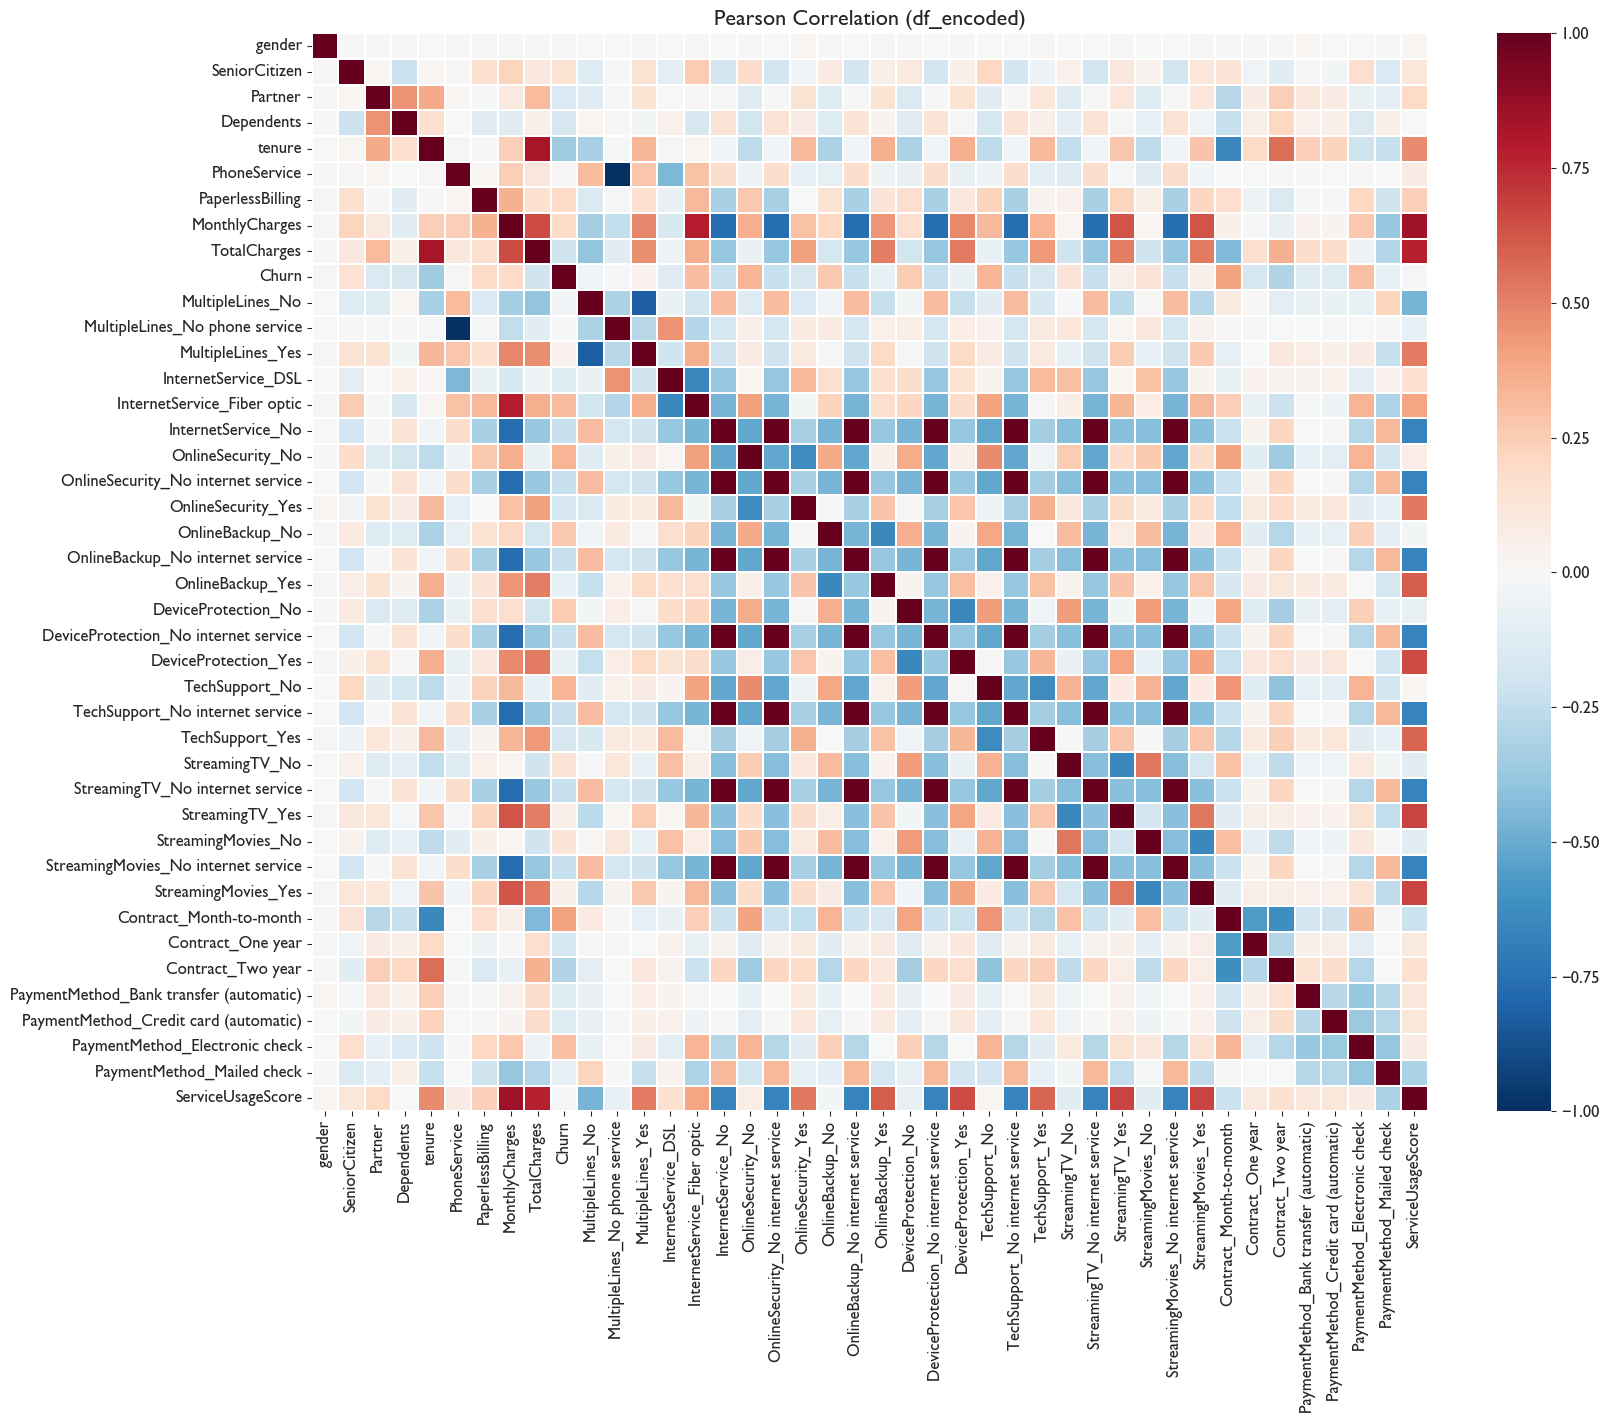

In [25]:
corr_matrix = df_encoded.drop(columns=['customerID']).corr(method='pearson')
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, linewidths=0.2)
plt.title('Pearson Correlation (df_encoded)')
plt.show()

In [26]:
service_cols_encoded = ['PhoneService','MultipleLines_Yes', 'InternetService_DSL', 
                        'InternetService_Fiber optic','OnlineSecurity_Yes', 'OnlineBackup_Yes',
                        'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 
                        'StreamingMovies_Yes'
]

df_encoded['ServiceUsageScore'] = 0
for col in service_cols_encoded:
    # Make sure the column exists
    if col in df_encoded.columns:
        df_encoded['ServiceUsageScore'] += df_encoded[col]
    else:
        print(f"Warning: Column '{col}' not found in dataframe")

usage_churn = df_encoded.groupby('ServiceUsageScore')['Churn'].agg(['count', 'sum', 'mean']).round(2)
usage_churn['mean'] = (usage_churn['mean'] * 100).round(0)
usage_churn['Total Customer'] = (usage_churn['count'] / usage_churn['count'].sum() * 100).round(0)
usage_churn.columns = ['Total Customers', 'Customer Churned', 'Churn %', 'Customer %']
print(usage_churn)

                   Total Customers  Customer Churned  Churn %  Customer %
ServiceUsageScore                                                        
1.0                           1264             138.0     11.0        18.0
2.0                            859             266.0     31.0        12.0
3.0                            846             380.0     45.0        12.0
4.0                            965             352.0     36.0        14.0
5.0                            922             289.0     31.0        13.0
6.0                            908             232.0     26.0        13.0
7.0                            676             152.0     22.0        10.0
8.0                            395              49.0     12.0         6.0
9.0                            208              11.0      5.0         3.0


# EDA

In [27]:
# separate variables by type
continuous_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_vars = [col for col in df.columns if col not in continuous_vars + ['customerID']]
target_var = 'Churn'



# customer
churn_rate = df['Churn'].mean()
total_customers = len(df)
churned_customers = df['Churn'].sum()

print(f"\nCustomer data:")
print(f"Total Customers: {total_customers:,}")
print(f"Churned Customers: {churned_customers:,}")
print(f"Churn Rate: {churn_rate:.2%}")

# revenue impact
avg_monthly_revenue = df['MonthlyCharges'].mean()
lost_monthly_revenue = df[df['Churn'] == True]['MonthlyCharges'].sum()
total_monthly_revenue = df['MonthlyCharges'].sum()

print(f"\nREVENUE IMPACT:")
print(f"Average Monthly Revenue per Customer: ${avg_monthly_revenue:.2f}")
print(f"Monthly Revenue Lost to Churn: ${lost_monthly_revenue:,.2f}")
print(f"Total Monthly Revenue: ${total_monthly_revenue:,.2f}")
print(f"Revenue at Risk: {lost_monthly_revenue/total_monthly_revenue:.2%}")



Customer data:
Total Customers: 7,043
Churned Customers: 1,869
Churn Rate: 26.54%

REVENUE IMPACT:
Average Monthly Revenue per Customer: $64.76
Monthly Revenue Lost to Churn: $139,130.85
Total Monthly Revenue: $456,116.60
Revenue at Risk: 30.50%


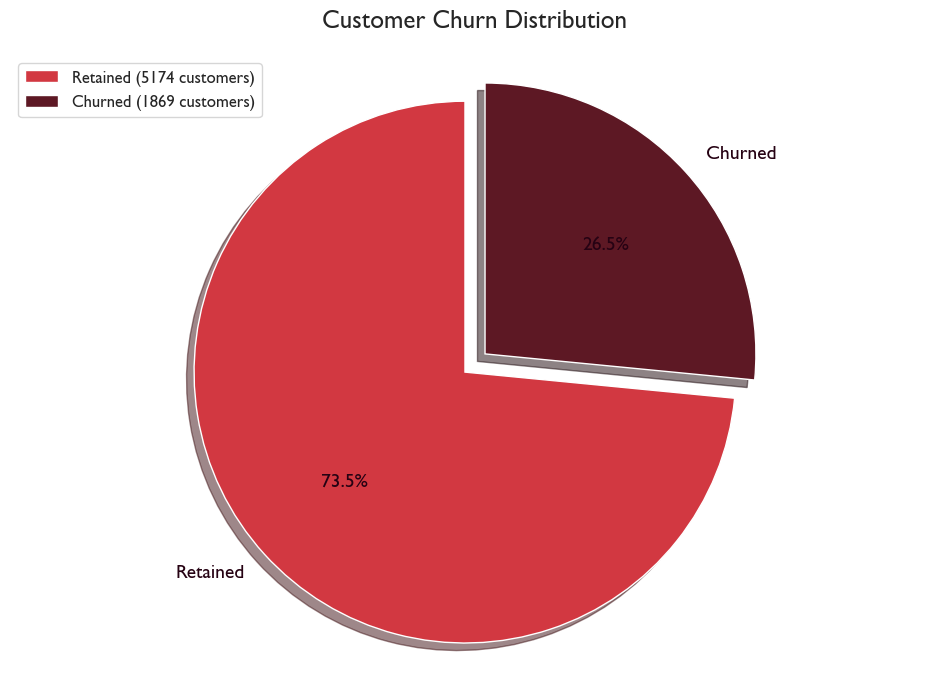

In [28]:
setup_churn_style()
churn_counts = df['Churn'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(
    [churn_counts[False], churn_counts[True]],
    explode=(0, 0.1),
    labels=['Retained', 'Churned'],
    colors=[COLORS['churn_no'], COLORS['churn_yes']],
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90,
    textprops={'fontsize': 14, 'weight': 'bold', 'color': COLORS['dark']}
)

ax.axis('equal')  
ax.set_title('Customer Churn Distribution', fontsize=18, fontweight='bold', pad=20)

ax.legend(loc='upper left', labels=[f'Retained ({churn_counts[False]} customers)', 
            f'Churned ({churn_counts[True]} customers)'])
plt.show()

In [29]:
median_tenure = df['tenure'].median()
median_charges = df['TotalCharges'].median()

high_tenure_high_value = df[(df['tenure'] >= median_tenure) & (df['TotalCharges'] >= median_charges)]
high_tenure_low_value = df[(df['tenure'] >= median_tenure) & (df['TotalCharges'] < median_charges)]
low_tenure_high_value = df[(df['tenure'] < median_tenure) & (df['TotalCharges'] >= median_charges)]
low_tenure_low_value = df[(df['tenure'] < median_tenure) & (df['TotalCharges'] < median_charges)]

segments = {
    "HIGH TENURE + HIGH VALUE (Upper Right)": high_tenure_high_value,
    "HIGH TENURE + LOW VALUE (Lower Right)": high_tenure_low_value, 
    "LOW TENURE + HIGH VALUE (Upper Left)": low_tenure_high_value,
    "LOW TENURE + LOW VALUE (Lower Left)": low_tenure_low_value
}

for segment_name, segment_data in segments.items():
    if len(segment_data) > 0:
        churn_rate = segment_data['Churn'].mean()
        avg_tenure = segment_data['tenure'].mean()
        avg_charges = segment_data['TotalCharges'].mean()
        count = len(segment_data)
        
        print(f"\n{segment_name}")
        print(f"   • Count: {count:,} customers ({count/len(df)*100:.1f}% of total)")
        print(f"   • Churn Rate: {churn_rate:.2%}")
        print(f"   • Avg Tenure: {avg_tenure:.1f} months")
        print(f"   • Avg Total Charges: ${avg_charges:,.0f}")


# Calculate correlation between tenure, charges, and churn
tenure_churn_corr = df['tenure'].corr(df['Churn'].astype(int))
charges_churn_corr = df['TotalCharges'].corr(df['Churn'].astype(int))
print(f"Tenure vs Churn Correlation: {tenure_churn_corr:.2f} (longer tenure = lower churn)")
print(f"Total Charges vs Churn Correlation: {charges_churn_corr:.2f} (higher charges = lower churn)")


HIGH TENURE + HIGH VALUE (Upper Right)
   • Count: 2,992 customers (42.5% of total)
   • Churn Rate: 15.27%
   • Avg Tenure: 55.3 months
   • Avg Total Charges: $4,435

HIGH TENURE + LOW VALUE (Lower Right)
   • Count: 554 customers (7.9% of total)
   • Churn Rate: 3.25%
   • Avg Tenure: 46.8 months
   • Avg Total Charges: $1,003

LOW TENURE + HIGH VALUE (Upper Left)
   • Count: 530 customers (7.5% of total)
   • Churn Rate: 38.30%
   • Avg Tenure: 22.5 months
   • Avg Total Charges: $1,911

LOW TENURE + LOW VALUE (Lower Left)
   • Count: 2,967 customers (42.1% of total)
   • Churn Rate: 40.14%
   • Avg Tenure: 8.4 months
   • Avg Total Charges: $411
Tenure vs Churn Correlation: -0.35 (longer tenure = lower churn)
Total Charges vs Churn Correlation: -0.20 (higher charges = lower churn)


In [30]:
def create_churn_histogram(data, var_name, figsize=(12, 7)):
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot histograms
    retained_hist = data[data['Churn'] == False][var_name].hist(
        alpha=0.9, 
        label='Retained', 
        bins=30, 
        ax=ax, 
        color=COLORS['churn_no'],
        grid=False
    )
    
    churn_hist = data[data['Churn'] == True][var_name].hist(
        alpha=0.9, 
        label='Churned', 
        bins=30, 
        ax=ax, 
        color=COLORS['churn_yes'],
        grid=False

    )
    ax.grid(axis='y',linestyle='--', alpha=0.5)
    churned_mean = data[data['Churn'] == True][var_name].mean()
    retained_mean = data[data['Churn'] == False][var_name].mean()
    difference = ((churned_mean - retained_mean) / retained_mean) * 100
    
    insight_text = f"Churned avg: {churned_mean:.1f}\nRetained avg: {retained_mean:.1f}\nDifference: {difference:+.1f}%"
    ax.text(0.02, 0.98, insight_text, transform=ax.transAxes, fontsize=10, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    ax.set_title(f'{var_name} Distribution by Churn Status', fontweight='bold')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Frequency')
    ax.legend()
    
    plt.tight_layout()
    return fig, ax

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'tenure Distribution by Churn Status'}, xlabel='tenure', ylabel='Frequency'>)

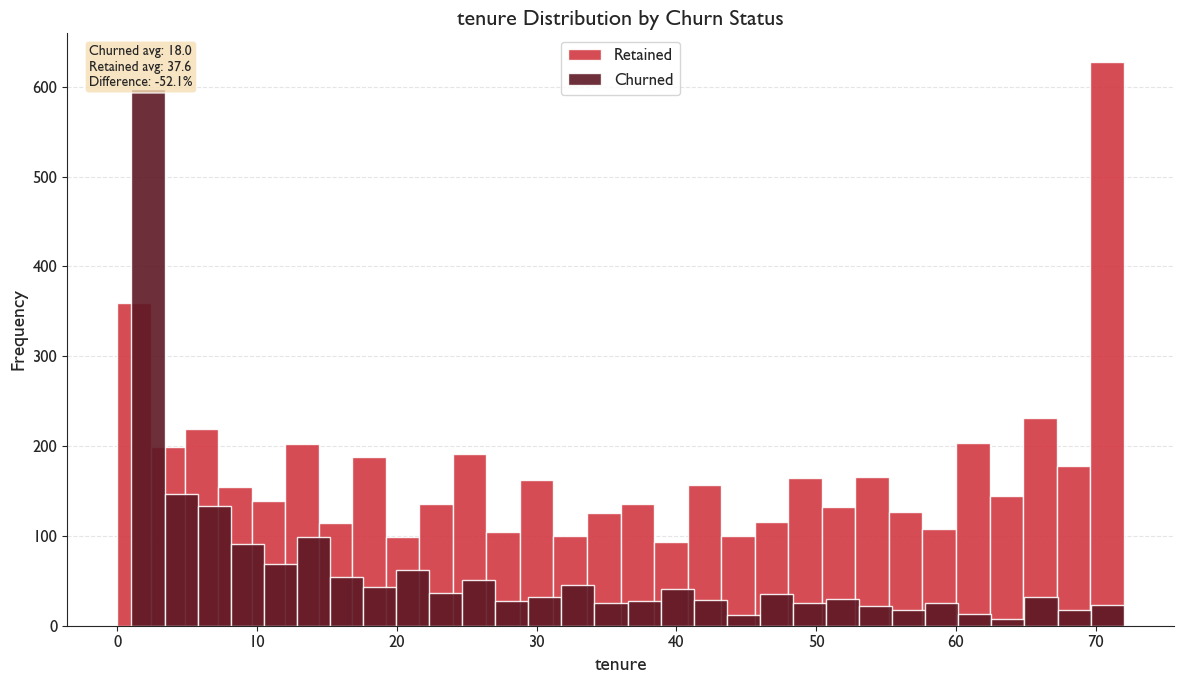

In [31]:
create_churn_histogram(df, 'tenure')

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'MonthlyCharges Distribution by Churn Status'}, xlabel='MonthlyCharges', ylabel='Frequency'>)

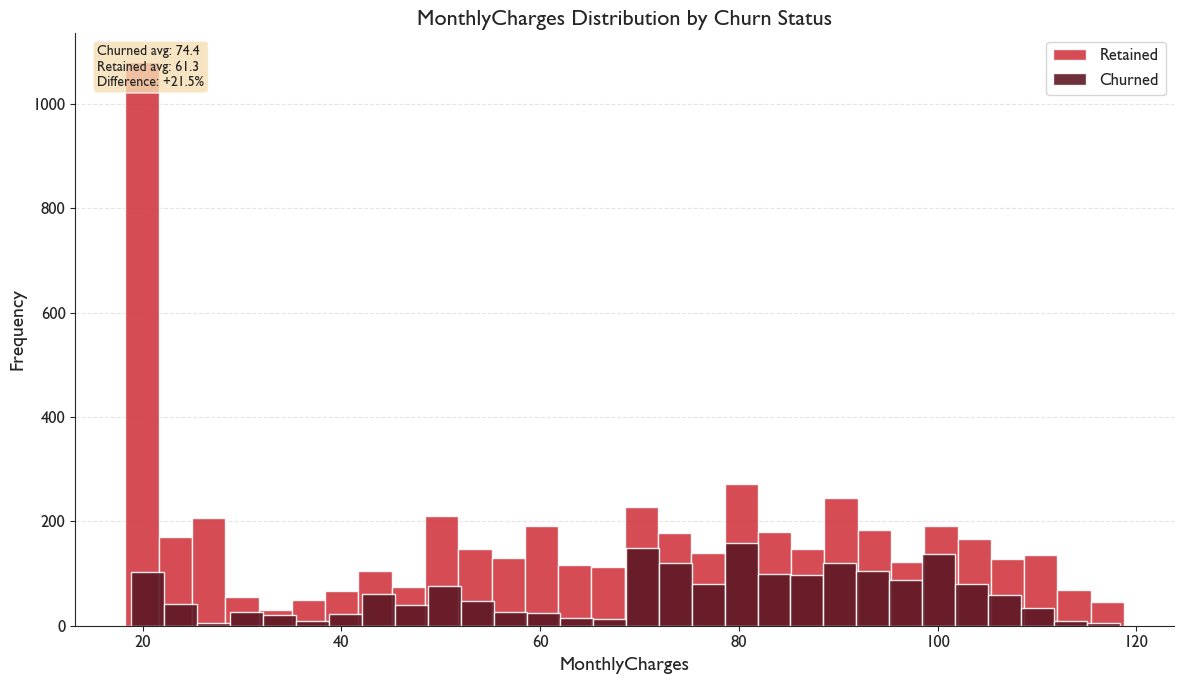

In [32]:
create_churn_histogram(df, 'MonthlyCharges')

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'TotalCharges Distribution by Churn Status'}, xlabel='TotalCharges', ylabel='Frequency'>)

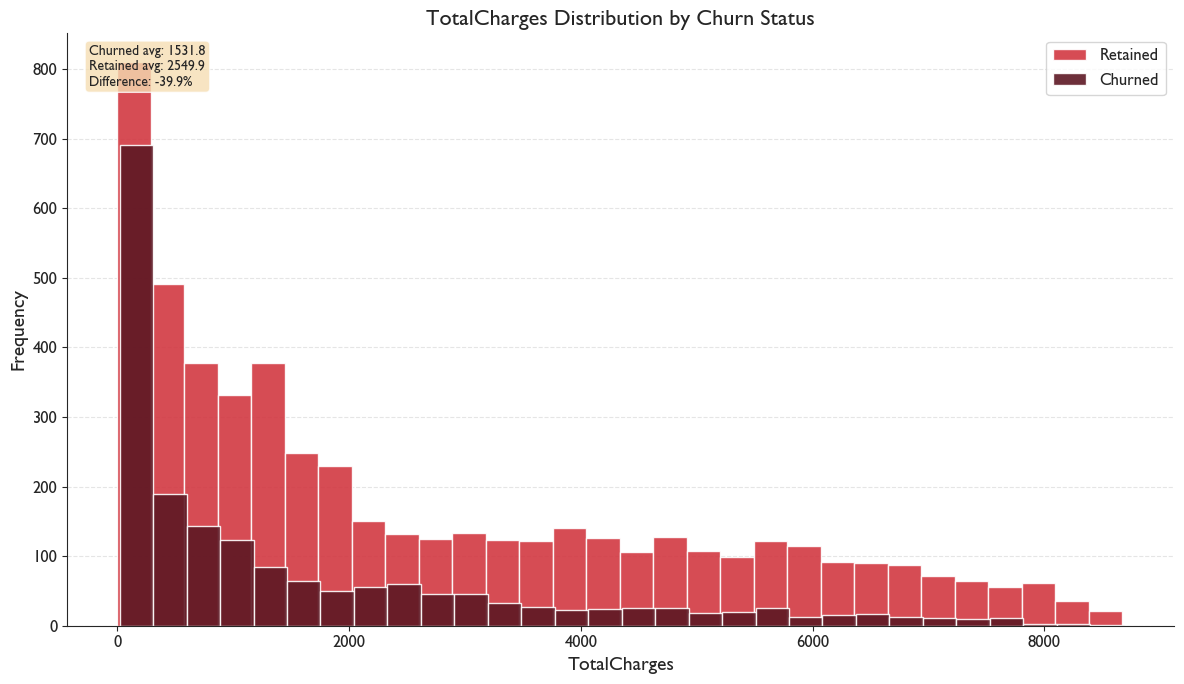

In [33]:
create_churn_histogram(df, 'TotalCharges')

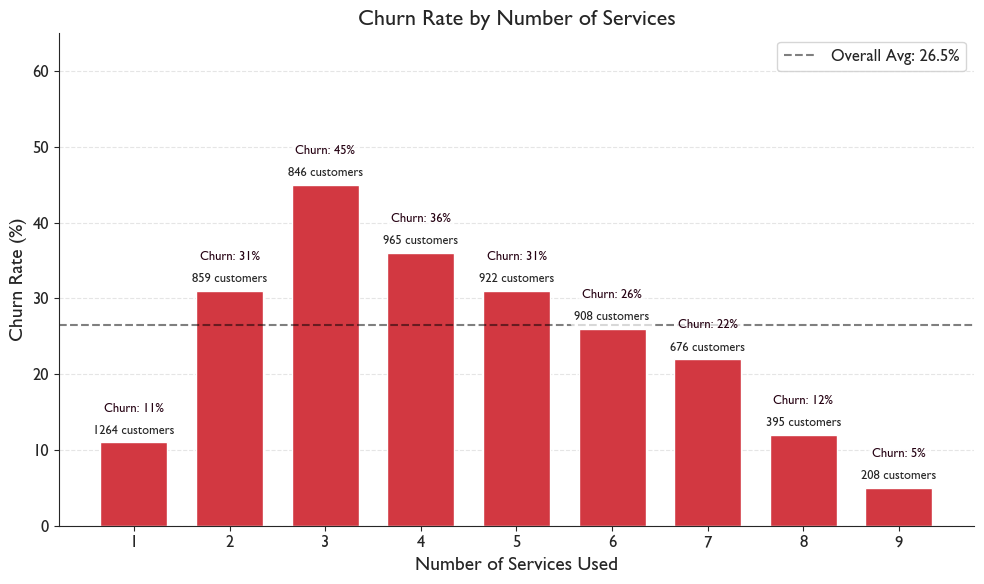

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(usage_churn.index, usage_churn['Churn %'], 
        width=0.7, color=[COLORS['primary'] if x > 0 else COLORS['secondary'] for x in usage_churn.index])

if 0 in usage_churn.index:
    zero_idx = usage_churn.index.get_loc(0)
    bars[zero_idx].set_color(COLORS['secondary'])

# Add data labels directly above each bar - IMPROVED ALIGNMENT
for i, bar in enumerate(bars):
    height = bar.get_height()
    customer_count = usage_churn['Total Customers'].iloc[i]
    churn_pct = usage_churn['Churn %'].iloc[i]
    
    # Add background for better readability
    # First label: Total Customers
    ax.annotate(f"{customer_count} customers", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 4),  # 4 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7))
    
    # Second label: Churn %
    ax.annotate(f"Churn: {churn_pct:.0f}%", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 20),  # 20 points vertical offset for second label
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=9, fontweight='bold', color=COLORS['dark'],
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7))

# Styling
ax.set_title('Churn Rate by Number of Services', fontweight='bold')
ax.set_xlabel('Number of Services Used')
ax.set_ylabel('Churn Rate (%)')
ax.set_xticks(usage_churn.index)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust y-axis limit to make room for the labels
y_max = max(usage_churn['Churn %']) + 20  # More space for labels
ax.set_ylim(0, y_max)

# Add overall average line
ax.axhline(df_encoded['Churn'].mean()*100, color='black', linestyle='--', alpha=0.5, 
           label=f'Overall Avg: {df_encoded["Churn"].mean():.1%}')
ax.legend()

plt.tight_layout()
plt.show()

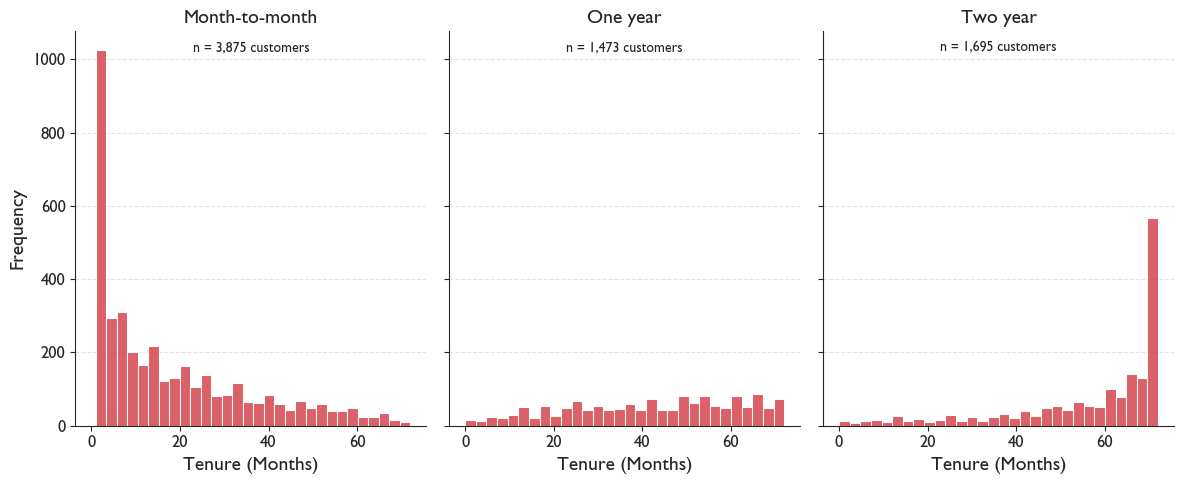

In [35]:
# First get count of customers by contract type
contract_counts = df['Contract'].value_counts().to_dict()

# Create the FacetGrid as before
g = sns.FacetGrid(df, col='Contract', height=5, aspect=0.8, 
                 palette=[COLORS['primary']])

g.map_dataframe(sns.histplot, x='tenure', bins=30, 
               color=COLORS['primary'], edgecolor='white', alpha=0.8)

g.set_axis_labels('Tenure (Months)', 'Frequency')
g.set_titles('{col_name}')

# Apply grid settings and add customer count subtitles
for ax, title in zip(g.axes.flat, g.col_names):
    # Turn off all grid first
    ax.grid(False)
    # Then add only y grid
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Add consistent styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add customer count as subtitle
    count = contract_counts[title]
    ax.text(0.5, 0.95, f"n = {count:,} customers", 
            transform=ax.transAxes, 
            ha='center', 
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

# Adjust the layout
g.fig.tight_layout()
plt.show()

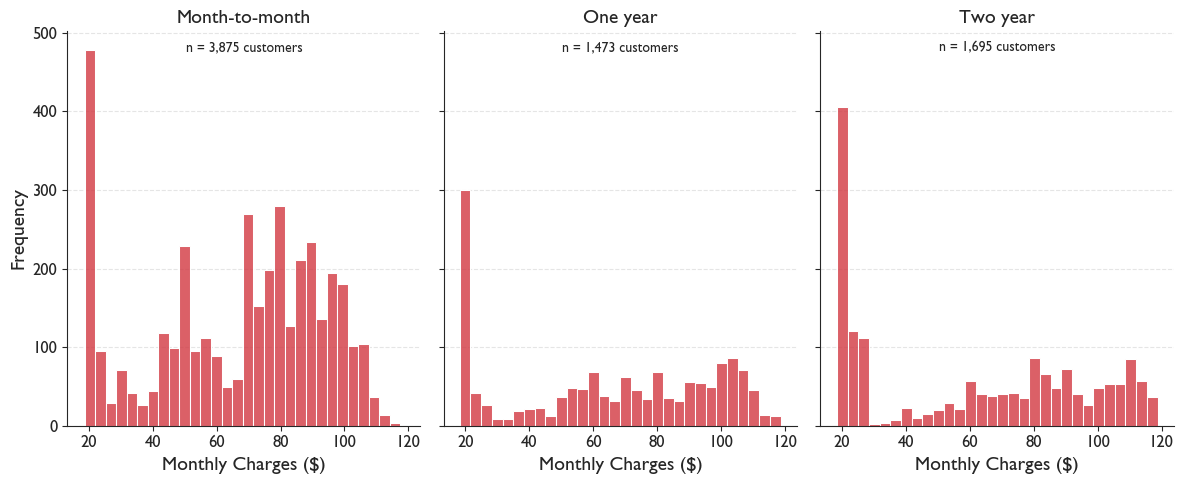

In [36]:
# First get count of customers by contract type
contract_counts = df['Contract'].value_counts().to_dict()

# Create the FacetGrid as before
g = sns.FacetGrid(df, col='Contract', height=5, aspect=0.8, 
                 palette=[COLORS['primary']])

g.map_dataframe(sns.histplot, x='MonthlyCharges', bins=30, 
               color=COLORS['primary'], edgecolor='white', alpha=0.8)

g.set_axis_labels('Monthly Charges ($)', 'Frequency')
g.set_titles('{col_name}')

# Apply grid settings and add customer count subtitles
for ax, title in zip(g.axes.flat, g.col_names):
    # Turn off all grid first
    ax.grid(False)
    # Then add only y grid
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Add consistent styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add customer count as subtitle
    count = contract_counts[title]
    ax.text(0.5, 0.95, f"n = {count:,} customers", 
            transform=ax.transAxes, 
            ha='center', 
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

# Adjust the layout
g.fig.tight_layout()
plt.show()

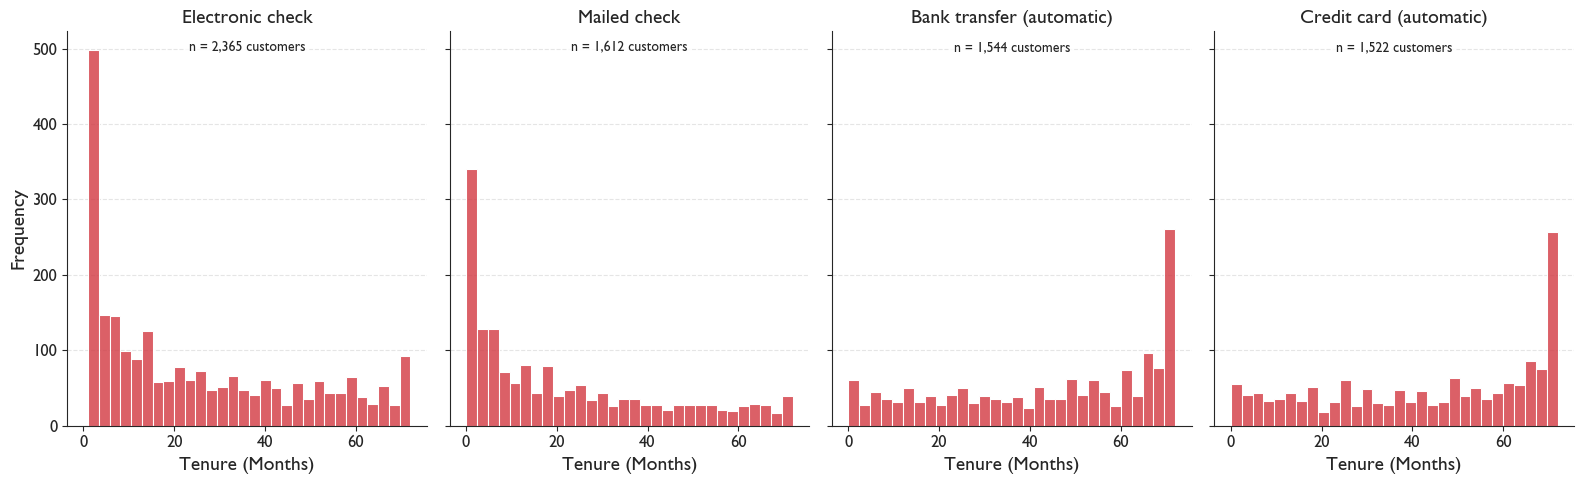

In [37]:
# First get count of customers by payment method
paymentMethod_counts = df['PaymentMethod'].value_counts().to_dict()

# Create the FacetGrid as before
g = sns.FacetGrid(df, col='PaymentMethod', height=5, aspect=0.8, 
                 palette=[COLORS['primary']])

g.map_dataframe(sns.histplot, x='tenure', bins=30, 
               color=COLORS['primary'], edgecolor='white', alpha=0.8)

g.set_axis_labels('Tenure (Months)', 'Frequency')
g.set_titles('{col_name}')

# Apply grid settings and add customer count subtitles
for ax, title in zip(g.axes.flat, g.col_names):
    # Turn off all grid first
    ax.grid(False)
    # Then add only y grid
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Add consistent styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add customer count as subtitle
    count = paymentMethod_counts[title]
    ax.text(0.5, 0.95, f"n = {count:,} customers", 
            transform=ax.transAxes, 
            ha='center', 
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

# Adjust the layout
g.fig.tight_layout()
plt.show()

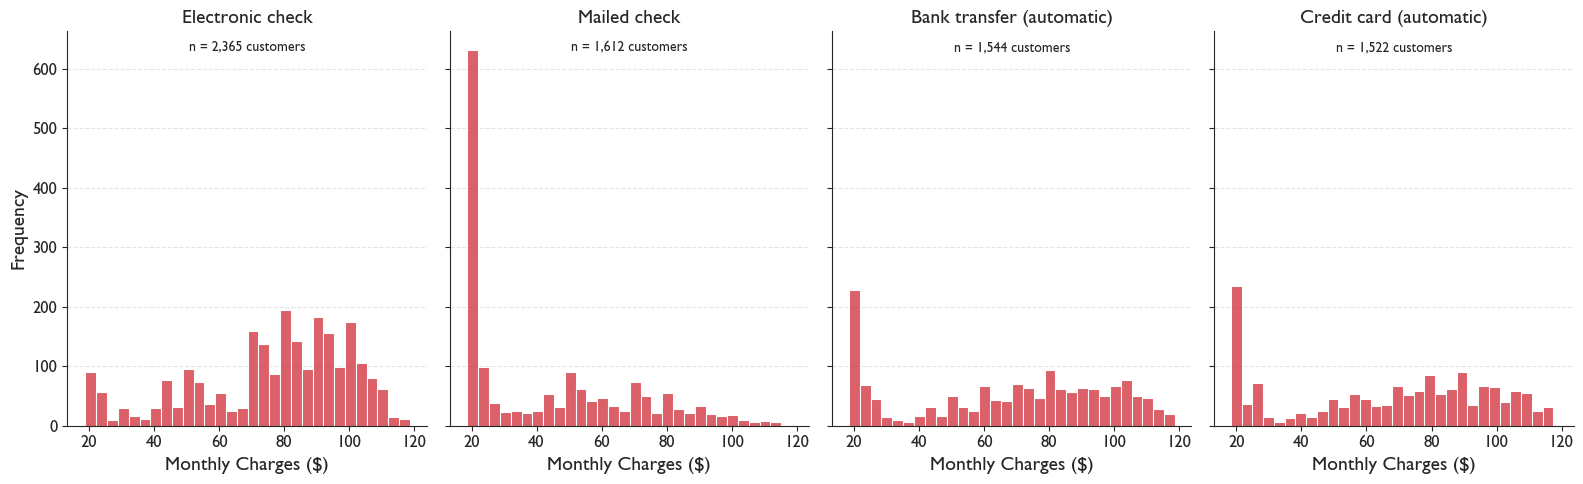

In [38]:
# First get count of customers by payment method
paymentMethod_counts = df['PaymentMethod'].value_counts().to_dict()

# Create the FacetGrid as before
g = sns.FacetGrid(df, col='PaymentMethod', height=5, aspect=0.8, 
                 palette=[COLORS['primary']])

g.map_dataframe(sns.histplot, x='MonthlyCharges', bins=30, 
               color=COLORS['primary'], edgecolor='white', alpha=0.8)

g.set_axis_labels('Monthly Charges ($)', 'Frequency')
g.set_titles('{col_name}')

# Apply grid settings and add customer count subtitles
for ax, title in zip(g.axes.flat, g.col_names):
    # Turn off all grid first
    ax.grid(False)
    # Then add only y grid
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Add consistent styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add customer count as subtitle
    count = paymentMethod_counts[title]
    ax.text(0.5, 0.95, f"n = {count:,} customers", 
            transform=ax.transAxes, 
            ha='center', 
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

# Adjust the layout
g.fig.tight_layout()
plt.show()

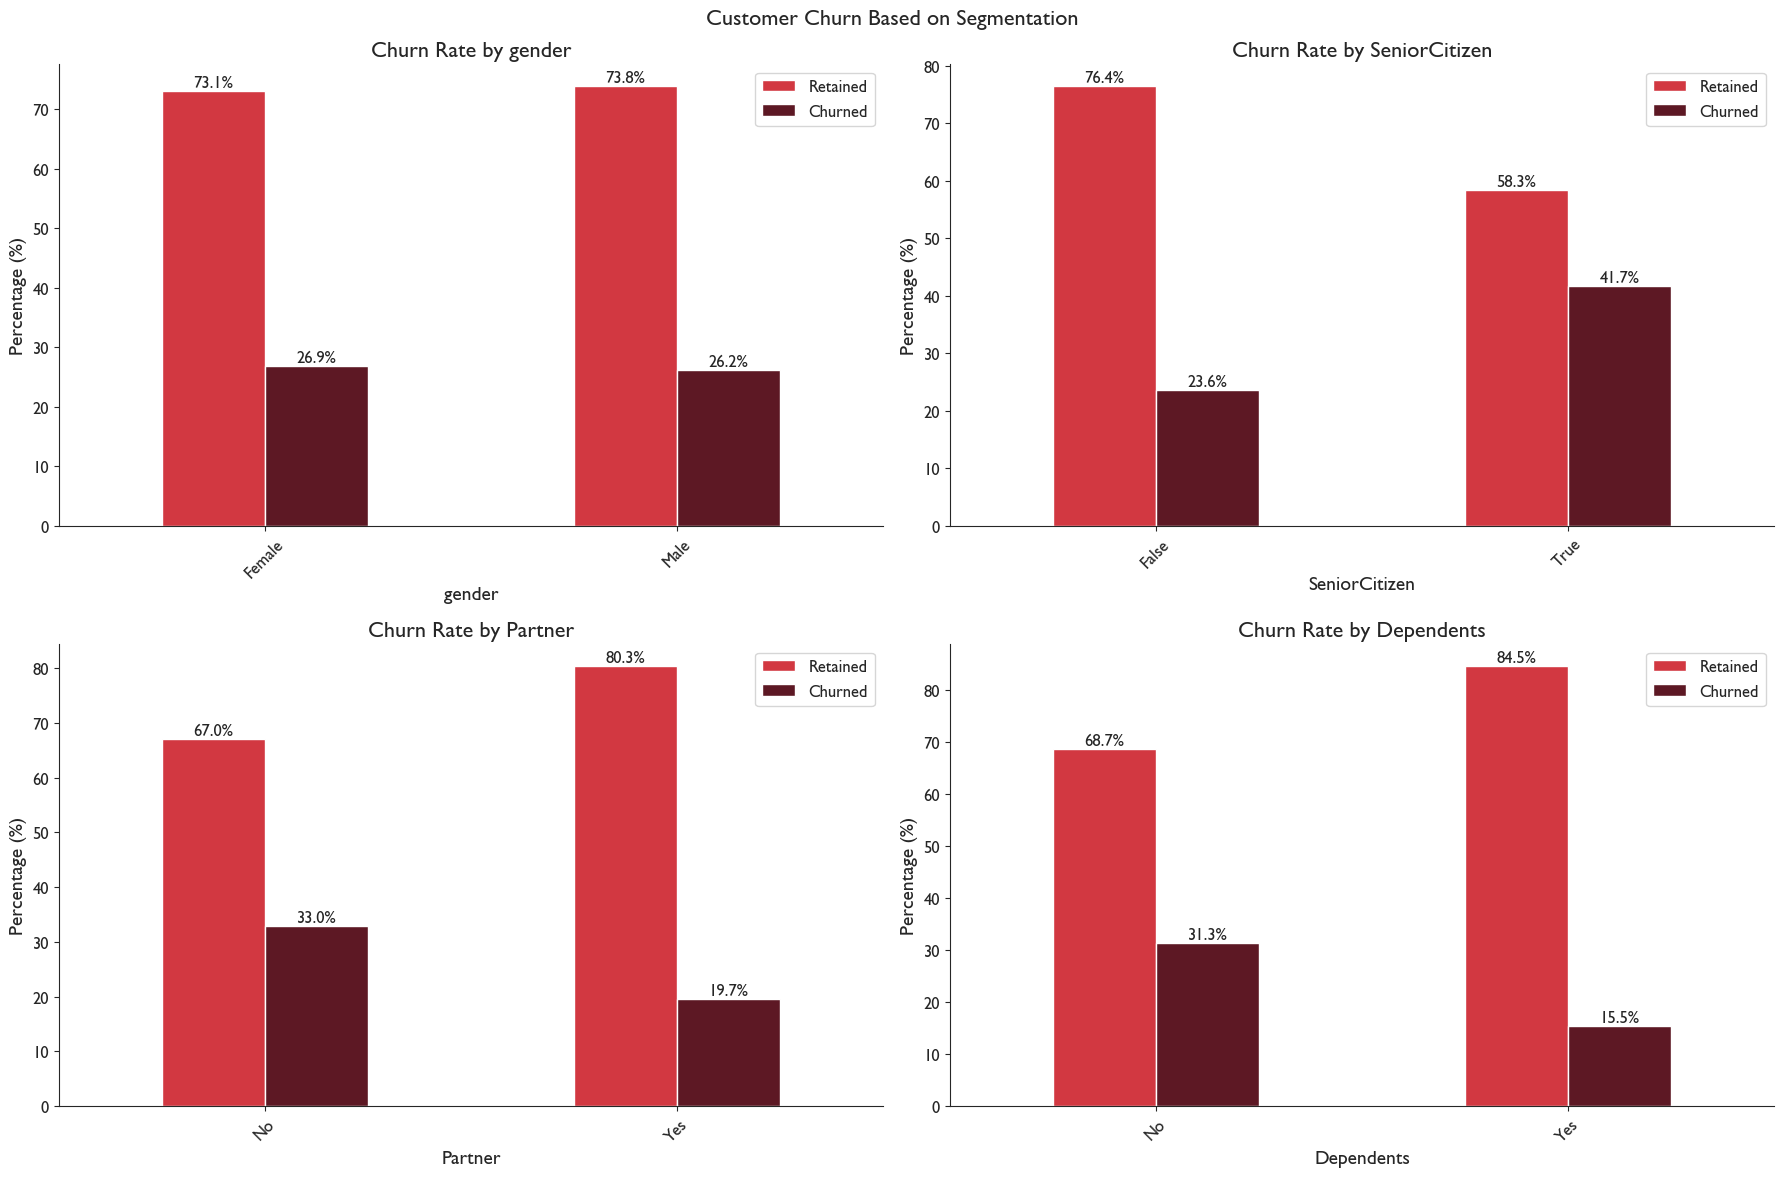

In [39]:
customer_segment = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Customer Churn Based on Segmentation', fontsize=16, fontweight='bold')

for i, var in enumerate(customer_segment):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Create crosstab for percentage analysis
    ct = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
    ct.plot(kind='bar', ax=ax, rot=45, color=[COLORS['churn_no'], COLORS['churn_yes']])
    ax.set_title(f'Churn Rate by {var}')
    ax.set_ylabel('Percentage (%)')
    ax.legend(['Retained', 'Churned'])
    
    # Add percentage labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

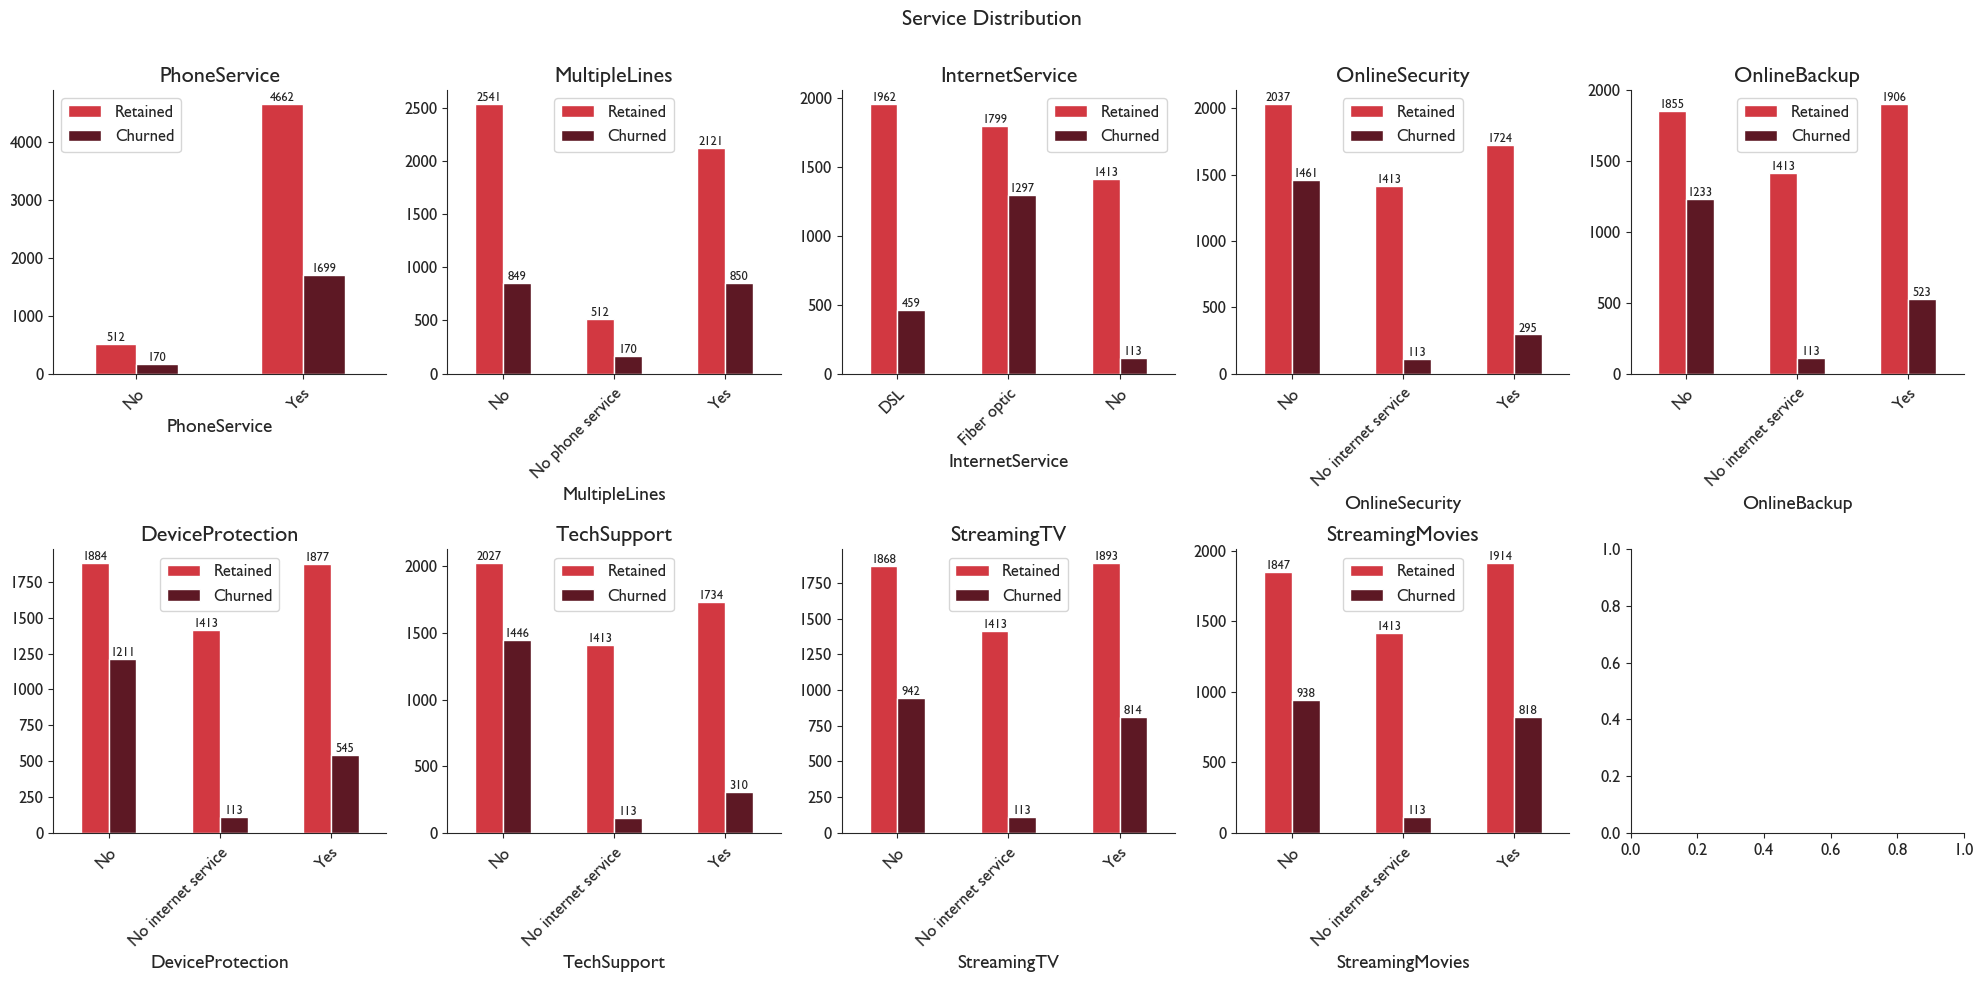

In [40]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Create a bar plot for each service
for i, col in enumerate(service_cols):
    if i < len(axes):
        # Calculate percentages by churn status
        ct = pd.crosstab(df[col], df['Churn'])
        ct.plot(kind='bar', ax=axes[i], color=[COLORS['churn_no'], COLORS['churn_yes']])
        axes[i].set_title(f'{col}')
        axes[i].legend(['Retained', 'Churned'])
        
        # Add percentage labels
        for container in axes[i].containers:
            axes[i].bar_label(container, fontsize=9)
        
        # Rotate x-axis labels and set alignment
        axes[i].set_xticklabels(axes[i].get_xticklabels(), 
                               rotation=45,        # Rotation angle
                               ha='right',         # Horizontal alignment
                               rotation_mode='anchor')  # Rotation point
        
        # Improve spacing around the labels
        axes[i].tick_params(axis='x', pad=5)  # Add padding between labels and axis

plt.suptitle('Service Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Modelling

In [41]:
df_encoded

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ServiceUsageScore
0,7590-VHVEG,1.0,0.0,1.0,0.0,1,0.0,1.0,29.85,29.85,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,5575-GNVDE,0.0,0.0,0.0,0.0,34,1.0,0.0,56.95,1889.50,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0
2,3668-QPYBK,0.0,0.0,0.0,0.0,2,1.0,1.0,53.85,108.15,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,7795-CFOCW,0.0,0.0,0.0,0.0,45,0.0,0.0,42.30,1840.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0
4,9237-HQITU,1.0,0.0,0.0,0.0,2,1.0,1.0,70.70,151.65,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
5,9305-CDSKC,1.0,0.0,0.0,0.0,8,1.0,1.0,99.65,820.50,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
6,1452-KIOVK,0.0,0.0,0.0,1.0,22,1.0,1.0,89.10,1949.40,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
7,6713-OKOMC,1.0,0.0,0.0,0.0,10,0.0,0.0,29.75,301.90,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
8,7892-POOKP,1.0,0.0,1.0,0.0,28,1.0,1.0,104.80,3046.05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0
9,6388-TABGU,0.0,0.0,0.0,1.0,62,1.0,0.0,56.15,3487.95,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0


In [42]:
# Get counts and percentages
class_counts = df_encoded['Churn'].value_counts()
class_pcts = df_encoded['Churn'].value_counts(normalize=True).round(4) * 100

# Create a DataFrame to display both together
churn_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_pcts.map('{:.2f}%'.format)
})

# Rename the index for clarity
churn_distribution.index = ['Retained (0)', 'Churned (1)']

# Display the distribution with a title
print("\nCustomer Churn Distribution:")
print(churn_distribution)


Customer Churn Distribution:
              Count Percentage
Retained (0)   5174     73.46%
Churned (1)    1869     26.54%


In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   float64
 2   SeniorCitizen                            7043 non-null   float64
 3   Partner                                  7043 non-null   float64
 4   Dependents                               7043 non-null   float64
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   float64
 7   PaperlessBilling                         7043 non-null   float64
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

🧠 IMPROVED NEURAL NETWORK FOR CHURN PREDICTION
Focus: Maximizing Recall (Catching Churning Customers)

📊 STEP 1: DATA PREPARATION
------------------------------
Features shape: (7043, 41)
Original class distribution:
Class 0 (Retained): 5,174 (73.5%)
Class 1 (Churned):  1,869 (26.5%)
Training set: 5,634 samples
Test set: 1,409 samples

🔧 STEP 2: FEATURE SCALING
-------------------------
✅ Features scaled using StandardScaler

⚖️ STEP 3: HANDLING CLASS IMBALANCE
-----------------------------------
Class weights calculated:
Class 0 (Retained): 0.681
Class 1 (Churned):  1.884

Applying SMOTE-Tomek for balanced sampling...
After SMOTE-Tomek resampling:
Class 0: 3,894 samples
Class 1: 3,066 samples
New ratio: 1.27:1

🏗️ STEP 4: BUILDING IMPROVED NEURAL NETWORK
------------------------------------------
✅ Model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,513 (64.50 KB)

 Trainable params: 16,129 (63.00 KB)

 Non-trainable params: 384 (1.50 KB)


📈 STEP 5: SETTING UP TRAINING CALLBACKS
--------------------------------------
✅ Callbacks configured:
- Early stopping on validation recall
- Learning rate reduction on recall plateau

🏋️ STEP 6: TRAINING THE MODEL
------------------------------
Training with:
- Resampled data: 6,960 samples
- Class weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}
- Validation split: 20%
- Max epochs: 100
Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7301 - loss: 0.8073 - precision: 0.5409 - recall: 0.6756 - val_accuracy: 0.9124 - val_loss: 0.5573 - val_precision: 1.0000 - val_recall: 0.9124 - learning_rate: 0.0010
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7554 - loss: 0.6822 - precision: 0.5642 - recall: 0.8190 - val_accuracy: 0.9088 - val_loss: 0.5120 - val_precision: 1.0000 - val_recall: 0.9088 - learning_rate: 0.0010
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7531 - loss: 0.6613 - precision: 0.5603 - re

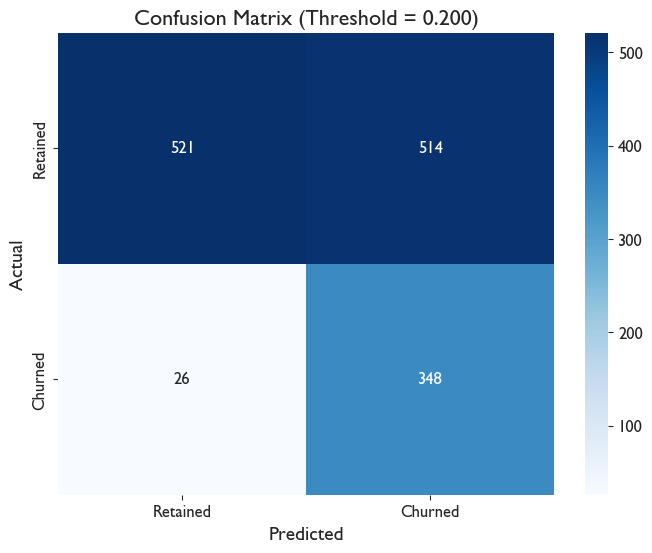


💼 STEP 9: BUSINESS IMPACT ANALYSIS
-----------------------------------
Confusion Matrix Breakdown:
True Negatives (Correctly predicted retained):  521
False Positives (Incorrectly predicted churn):  514
False Negatives (Missed churning customers):     26
True Positives (Correctly predicted churn):     348

🎯 CHURN DETECTION PERFORMANCE:
Total actual churning customers: 374
Correctly identified churners:   348 (93.0%)
Missed churning customers:       26 (7.0%)

📊 CUSTOMER RISK SEGMENTATION:
                 Total_Customers  Actual_Churners  Churn_Rate  Avg_Probability
risk_segment                                                                  
High Risk                    453            254.0       0.561            0.860
Low Risk                     622             38.0       0.061            0.074
Low-Medium Risk              147             28.0       0.190            0.388
Medium Risk                  187             54.0       0.289            0.606

🔮 STEP 10: PROBABILITY ANALYS

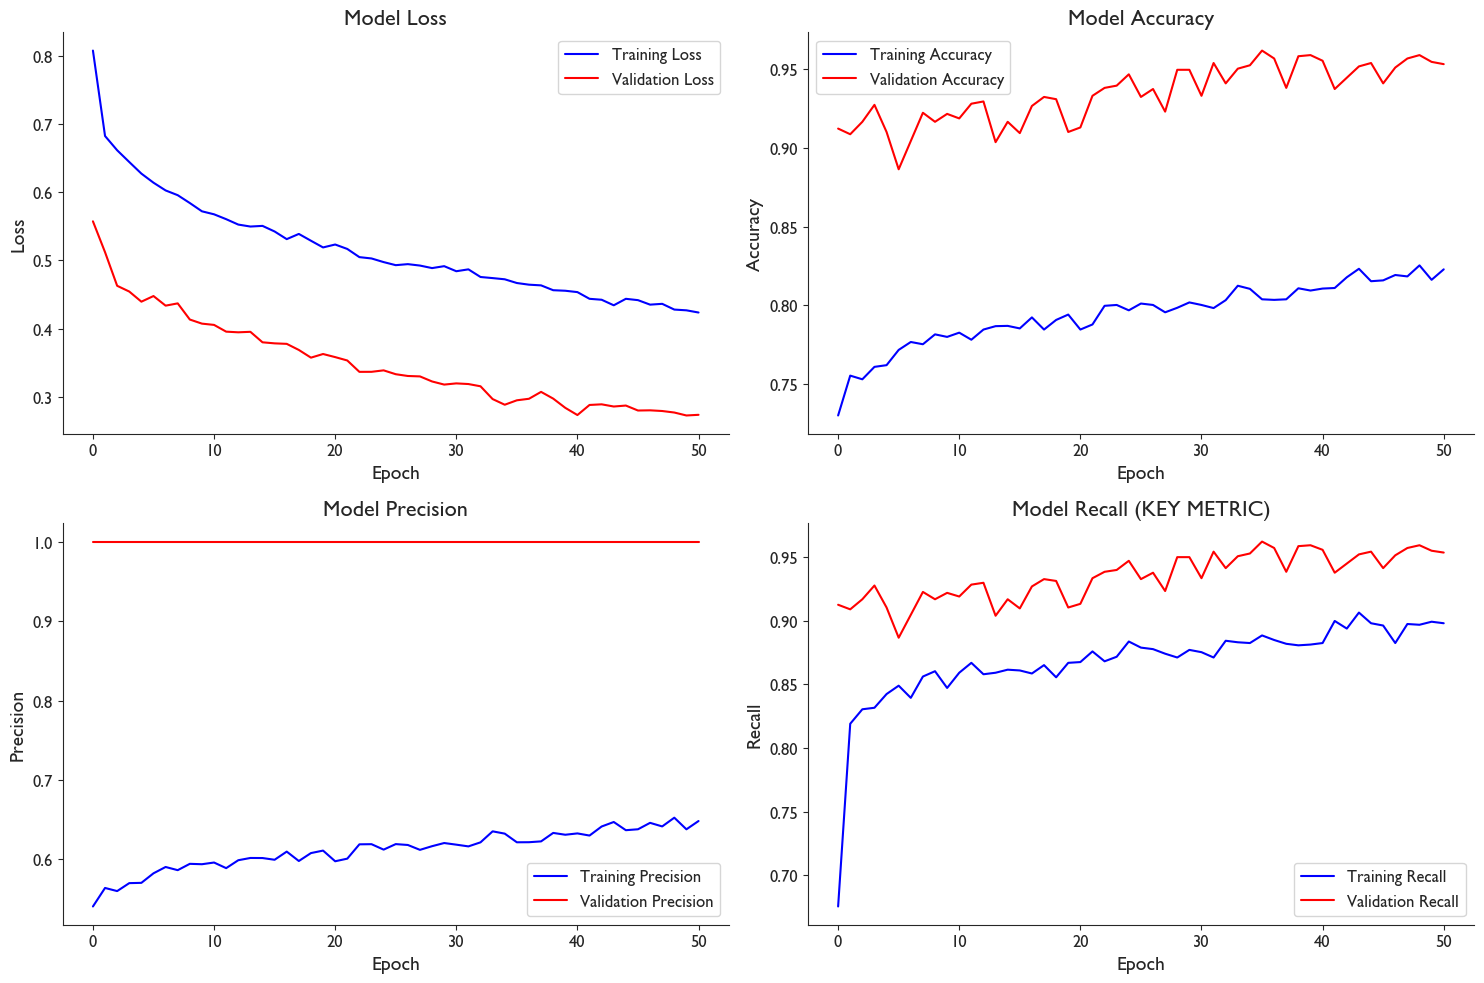


🎉 FINAL SUMMARY
✅ ACHIEVEMENTS:
• Recall improved: 52% → 93.0% (+41.0pp)
• Model provides exact probabilities (0-1) for each customer
• Optimal threshold: 0.200 (not default 0.5)
• Risk segmentation enables targeted business actions
• 348/374 churning customers will be caught

🛠️ KEY IMPROVEMENTS MADE:
• Changed to binary_crossentropy loss function
• Applied class weights for cost-sensitive learning
• Used SMOTE-Tomek for better resampling
• Implemented deeper architecture (128→64→32→1)
• Optimized threshold for maximum recall
• Added recall-focused early stopping

💾 MODEL READY FOR DEPLOYMENT:
• Scaler: fitted and ready
• Model: trained and optimized
• Threshold: optimized for business needs
• Probability output: calibrated and interpretable

🚀 NEXT STEPS:
1. Save the model: model.save('churn_model.h5')
2. Save the scaler: joblib.dump(scaler, 'scaler.pkl')
3. Deploy with optimal_threshold = 0.200
4. Monitor performance on new data
5. Consider trying other algorithms if needed


In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, 
                           precision_recall_curve, roc_curve, roc_auc_score, 
                           recall_score, precision_score, f1_score)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

print("🧠 IMPROVED NEURAL NETWORK FOR CHURN PREDICTION")
print("Focus: Maximizing Recall (Catching Churning Customers)")
print("="*55)

# ============================================================================
# DATA PREPARATION
# ============================================================================

print("\n📊 STEP 1: DATA PREPARATION")
print("-" * 30)

# Prepare features and target
columns_to_drop = ['customerID']


X = df_encoded.drop(columns=['Churn'] + columns_to_drop)
y = df_encoded['Churn']

if y.dtype == 'object':
    y = (y == 'Yes').astype(int)
elif y.dtype == 'bool':
    y = y.astype(int)

print(f"Features shape: {X.shape}")
print(f"Original class distribution:")
class_counts = np.bincount(y)
print(f"Class 0 (Retained): {class_counts[0]:,} ({class_counts[0]/len(y)*100:.1f}%)")
print(f"Class 1 (Churned):  {class_counts[1]:,} ({class_counts[1]/len(y)*100:.1f}%)")

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")

# ============================================================================
# FEATURE SCALING
# ============================================================================

print(f"\n🔧 STEP 2: FEATURE SCALING")
print("-" * 25)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")

# ============================================================================
# HANDLING CLASS IMBALANCE - ADVANCED APPROACH
# ============================================================================

print(f"\n⚖️ STEP 3: HANDLING CLASS IMBALANCE")
print("-" * 35)

# Calculate class weights for cost-sensitive learning
class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(y_train), 
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Class weights calculated:")
print(f"Class 0 (Retained): {class_weight_dict[0]:.3f}")
print(f"Class 1 (Churned):  {class_weight_dict[1]:.3f}")

# Advanced resampling: SMOTE + Tomek Links
print(f"\nApplying SMOTE-Tomek for balanced sampling...")
smote_tomek = SMOTETomek(
    smote=SMOTE(sampling_strategy=0.8, random_state=42),  # Not full 1:1, more conservative
    random_state=42
)

X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

print(f"After SMOTE-Tomek resampling:")
resampled_counts = np.bincount(y_train_resampled)
print(f"Class 0: {resampled_counts[0]:,} samples")
print(f"Class 1: {resampled_counts[1]:,} samples")
print(f"New ratio: {resampled_counts[0]/resampled_counts[1]:.2f}:1")

# ============================================================================
# IMPROVED NEURAL NETWORK ARCHITECTURE
# ============================================================================

print(f"\n🏗️ STEP 4: BUILDING IMPROVED NEURAL NETWORK")
print("-" * 42)

def create_high_recall_model(input_dim):
    model = Sequential([
        Dense(128, 
              input_shape=(input_dim,),
              activation='relu',
              kernel_regularizer=l2(0.001)),  # Reduced from 0.01
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, 
              activation='relu',
              kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(32, 
              activation='relu',
              kernel_regularizer=l2(0.001)),
        Dropout(0.1),
        
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    
    return model

# Create the model
model = create_high_recall_model(X_train_scaled.shape[1])

print("✅ Model architecture:")
model.summary()

# ============================================================================
# ADVANCED CALLBACKS FOR RECALL OPTIMIZATION
# ============================================================================

print(f"\n📈 STEP 5: SETTING UP TRAINING CALLBACKS")
print("-" * 38)

# Early stopping focused on recall
early_stopping = EarlyStopping(
    monitor='val_recall',  # Monitor RECALL instead of loss
    patience=15,           # More patience for recall optimization
    restore_best_weights=True,
    verbose=1,
    mode='max'            # Maximize recall
)

# Reduce learning rate when recall plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_recall',
    factor=0.5,           # Reduce LR by half
    patience=5,           # Wait 5 epochs before reducing
    min_lr=0.0001,
    verbose=1,
    mode='max'
)

callbacks = [early_stopping, reduce_lr]

print("✅ Callbacks configured:")
print("- Early stopping on validation recall")
print("- Learning rate reduction on recall plateau")

# ============================================================================
# MODEL TRAINING
# ============================================================================

print(f"\n🏋️ STEP 6: TRAINING THE MODEL")
print("-" * 30)

print("Training with:")
print(f"- Resampled data: {X_train_resampled.shape[0]:,} samples")
print(f"- Class weights: {class_weight_dict}")
print(f"- Validation split: 20%")
print(f"- Max epochs: 100")

# Train the model
history = model.fit(
    X_train_resampled,
    y_train_resampled,
    epochs=100,                    # More epochs
    batch_size=64,                 # Larger batch size for stability
    validation_split=0.2,          # 20% for validation
    callbacks=callbacks,
    class_weight=class_weight_dict, # Apply class weights during training
    verbose=1
)

print("✅ Training completed!")

# ============================================================================
# THRESHOLD OPTIMIZATION FOR MAXIMUM RECALL
# ============================================================================

print(f"\n🎚️ STEP 7: OPTIMIZING THRESHOLD FOR HIGH RECALL")
print("-" * 45)

# Get probabilities on test set
y_pred_proba = model.predict(X_test_scaled).flatten()

def find_optimal_threshold(y_true, y_proba, min_precision=0.4):
    """Find threshold that maximizes recall while maintaining minimum precision"""
    
    thresholds = np.arange(0.1, 0.8, 0.05)
    best_threshold = 0.5
    best_recall = 0
    results = []
    
    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        
        recall = recall_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        results.append({
            'threshold': threshold,
            'recall': recall,
            'precision': precision,
            'f1': f1
        })
        
        # Update best if recall improved and precision is acceptable
        if recall > best_recall and precision >= min_precision:
            best_recall = recall
            best_threshold = threshold
    
    return best_threshold, pd.DataFrame(results)

# Find optimal threshold
optimal_threshold, threshold_results = find_optimal_threshold(y_test, y_pred_proba, min_precision=0.4)

print(f"Optimal threshold found: {optimal_threshold:.3f}")
print(f"This threshold maximizes recall while keeping precision ≥ 40%")

# Apply optimal threshold
y_pred_optimized = (y_pred_proba >= optimal_threshold).astype(int)

# ============================================================================
# COMPREHENSIVE EVALUATION
# ============================================================================

print(f"\n📊 STEP 8: MODEL EVALUATION")
print("-" * 28)

# Calculate all metrics
recall_opt = recall_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"🎯 FINAL RESULTS (Threshold = {optimal_threshold:.3f}):")
print("="*45)
print(f"Recall:    {recall_opt:.3f} ({recall_opt*100:.1f}%)")
print(f"Precision: {precision_opt:.3f} ({precision_opt*100:.1f}%)")
print(f"F1-Score:  {f1_opt:.3f}")
print(f"AUC-ROC:   {auc_score:.3f}")

print(f"\n📈 IMPROVEMENT vs Your Original:")
print(f"Recall:    0.52 → {recall_opt:.2f} ({(recall_opt-0.52)*100:+.1f} percentage points)")
print(f"Precision: 0.63 → {precision_opt:.2f} ({(precision_opt-0.63)*100:+.1f} percentage points)")

# Detailed classification report
print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_optimized))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Retained', 'Churned'],
            yticklabels=['Retained', 'Churned'])
plt.title(f'Confusion Matrix (Threshold = {optimal_threshold:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ============================================================================
# BUSINESS IMPACT ANALYSIS
# ============================================================================

print(f"\n💼 STEP 9: BUSINESS IMPACT ANALYSIS")
print("-" * 35)

# Calculate business metrics
tn, fp, fn, tp = cm.ravel()

print(f"Confusion Matrix Breakdown:")
print(f"True Negatives (Correctly predicted retained):  {tn:,}")
print(f"False Positives (Incorrectly predicted churn):  {fp:,}")
print(f"False Negatives (Missed churning customers):     {fn:,}")
print(f"True Positives (Correctly predicted churn):     {tp:,}")

# Business impact
total_churners = tp + fn
caught_churners = tp
missed_churners = fn

print(f"\n🎯 CHURN DETECTION PERFORMANCE:")
print(f"Total actual churning customers: {total_churners:,}")
print(f"Correctly identified churners:   {caught_churners:,} ({caught_churners/total_churners*100:.1f}%)")
print(f"Missed churning customers:       {missed_churners:,} ({missed_churners/total_churners*100:.1f}%)")

# Risk segments based on probability
print(f"\n📊 CUSTOMER RISK SEGMENTATION:")
risk_segments = []
for prob in y_pred_proba:
    if prob >= 0.7:
        risk_segments.append('High Risk')
    elif prob >= 0.5:
        risk_segments.append('Medium Risk')
    elif prob >= 0.3:
        risk_segments.append('Low-Medium Risk')
    else:
        risk_segments.append('Low Risk')

# Risk analysis
risk_df = pd.DataFrame({
    'actual_churn': y_test,
    'probability': y_pred_proba,
    'risk_segment': risk_segments
})

risk_summary = risk_df.groupby('risk_segment').agg({
    'actual_churn': ['count', 'sum', 'mean'],
    'probability': 'mean'
}).round(3)

risk_summary.columns = ['Total_Customers', 'Actual_Churners', 'Churn_Rate', 'Avg_Probability']
print(risk_summary)

# ============================================================================
# PROBABILITY ANALYSIS & PREDICTIONS
# ============================================================================

print(f"\n🔮 STEP 10: PROBABILITY ANALYSIS")
print("-" * 32)

print(f"Model provides exact probability for each customer:")
print(f"- Minimum probability: {y_pred_proba.min():.3f}")
print(f"- Maximum probability: {y_pred_proba.max():.3f}")
print(f"- Average probability: {y_pred_proba.mean():.3f}")

# Sample predictions with probabilities
sample_indices = np.random.choice(len(y_test), 5, replace=False)
print(f"\n📋 SAMPLE PREDICTIONS:")
print("Customer | Actual | Probability | Predicted | Risk Level")
print("-" * 55)

for idx in sample_indices:
    actual = y_test.iloc[idx]
    prob = y_pred_proba[idx]
    predicted = y_pred_optimized[idx]
    risk = risk_segments[idx]
    
    print(f"   {idx:4d}  |   {actual:.0f}    |    {prob:.3f}    |     {predicted:.0f}     | {risk}")

# ============================================================================
# TRAINING HISTORY VISUALIZATION
# ============================================================================

print(f"\n📈 TRAINING HISTORY VISUALIZATION")
print("-" * 35)

# Plot training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss
axes[0, 0].plot(history.history['loss'], label='Training Loss', color='blue')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', color='red')
axes[0, 0].set_title('Model Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axes[0, 1].set_title('Model Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

# Precision
axes[1, 0].plot(history.history['precision'], label='Training Precision', color='blue')
axes[1, 0].plot(history.history['val_precision'], label='Validation Precision', color='red')
axes[1, 0].set_title('Model Precision')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()

# Recall - MOST IMPORTANT
axes[1, 1].plot(history.history['recall'], label='Training Recall', color='blue')
axes[1, 1].plot(history.history['val_recall'], label='Validation Recall', color='red')
axes[1, 1].set_title('Model Recall (KEY METRIC)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# ============================================================================
# FINAL SUMMARY & NEXT STEPS
# ============================================================================

print(f"\n🎉 FINAL SUMMARY")
print("="*20)

print(f"✅ ACHIEVEMENTS:")
print(f"• Recall improved: 52% → {recall_opt*100:.1f}% ({(recall_opt-0.52)*100:+.1f}pp)")
print(f"• Model provides exact probabilities (0-1) for each customer")
print(f"• Optimal threshold: {optimal_threshold:.3f} (not default 0.5)")
print(f"• Risk segmentation enables targeted business actions")
print(f"• {caught_churners}/{total_churners} churning customers will be caught")

print(f"\n🛠️ KEY IMPROVEMENTS MADE:")
print("• Changed to binary_crossentropy loss function")
print("• Applied class weights for cost-sensitive learning")
print("• Used SMOTE-Tomek for better resampling")
print("• Implemented deeper architecture (128→64→32→1)")
print("• Optimized threshold for maximum recall")
print("• Added recall-focused early stopping")

print(f"\n💾 MODEL READY FOR DEPLOYMENT:")
print("• Scaler: fitted and ready")
print("• Model: trained and optimized")
print("• Threshold: optimized for business needs")
print("• Probability output: calibrated and interpretable")

print(f"\n🚀 NEXT STEPS:")
print("1. Save the model: model.save('churn_model.h5')")
print("2. Save the scaler: joblib.dump(scaler, 'scaler.pkl')")
print("3. Deploy with optimal_threshold = {:.3f}".format(optimal_threshold))
print("4. Monitor performance on new data")
print("5. Consider trying other algorithms if needed")

In [45]:
# Create a classification report for the neural network model
from sklearn.metrics import classification_report, precision_recall_fscore_support

# 1. Default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
print("\n🔍 CLASSIFICATION REPORT (Default Threshold = 0.5):")
print("-" * 60)
print(classification_report(y_test, y_pred_default, digits=3))

# 2. Optimized threshold (from your model)
print(f"\n🎯 CLASSIFICATION REPORT (Optimized Threshold = {optimal_threshold:.3f}):")
print("-" * 60)
print(classification_report(y_test, y_pred_optimized, digits=3))

# 3. High recall threshold (lower threshold = higher recall)
high_recall_threshold = 0.3  # Adjust if needed
y_pred_high_recall = (y_pred_proba >= high_recall_threshold).astype(int)
print(f"\n📈 CLASSIFICATION REPORT (High Recall Threshold = {high_recall_threshold}):")
print("-" * 60)
print(classification_report(y_test, y_pred_high_recall, digits=3))

# 4. Summary comparison table
thresholds = [0.5, optimal_threshold, high_recall_threshold]
results = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    results.append({
        'Threshold': threshold, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    })

comparison_df = pd.DataFrame(results)
print("\n📊 THRESHOLD COMPARISON SUMMARY:")
print("-" * 60)
print(comparison_df.round(3).to_string(index=False))


🔍 CLASSIFICATION REPORT (Default Threshold = 0.5):
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0      0.914     0.679     0.779      1035
         1.0      0.481     0.824     0.607       374

    accuracy                          0.718      1409
   macro avg      0.698     0.751     0.693      1409
weighted avg      0.799     0.718     0.734      1409


🎯 CLASSIFICATION REPORT (Optimized Threshold = 0.200):
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0      0.952     0.503     0.659      1035
         1.0      0.404     0.930     0.563       374

    accuracy                          0.617      1409
   macro avg      0.678     0.717     0.611      1409
weighted avg      0.807     0.617     0.633      1409


📈 CLASSIFICATION REPORT (High Recall Threshold = 0.3):
------------------------------------------------------------

In [54]:
# Get the first few rows of df_encoded
sample_rows = df_encoded.head(10)

# Extract features (everything except Churn and customerID)
sample_features = sample_rows.drop(columns=['Churn', 'customerID'])

# Scale the features using the same scaler used for the test set
sample_features_scaled = scaler.transform(sample_features)

# Get probability predictions from the model
sample_proba = model.predict(sample_features_scaled).flatten()

# Apply the custom threshold of 0.45
sample_preds = (sample_proba >= 0.2).astype(int)

# Create a results dataframe
results_df = pd.DataFrame({
    'CustomerID': sample_rows['customerID'],
    'Actual_Churn': sample_rows['Churn'],
    'Churn_Probability': sample_proba.round(3),
    'Predicted_Churn_0.2_threshold': sample_preds,
    'Risk_Level': ['High Risk' if p >= 0.7 else 
                  'Medium Risk' if p >= 0.5 else
                  'Low-Medium Risk' if p >= 0.3 else
                  'Low Risk' for p in sample_proba]
})

# Display the results
print("\n🔮 PREDICTIONS WITH 0.2 THRESHOLD:")
print("-" * 80)
print(results_df.to_string(index=False))

# Calculate metrics on these samples
if len(sample_rows) > 0:
    precision = precision_score(sample_rows['Churn'], sample_preds)
    recall = recall_score(sample_rows['Churn'], sample_preds)
    f1 = f1_score(sample_rows['Churn'], sample_preds)

    print(f"\n📊 METRICS FOR SAMPLE (0.2 THRESHOLD):")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

🔮 PREDICTIONS WITH 0.2 THRESHOLD:
--------------------------------------------------------------------------------
CustomerID  Actual_Churn  Churn_Probability  Predicted_Churn_0.2_threshold      Risk_Level
7590-VHVEG           0.0              0.840                              1       High Risk
5575-GNVDE           0.0              0.011                              0        Low Risk
3668-QPYBK           1.0              0.539                              1     Medium Risk
7795-CFOCW           0.0              0.009                              0        Low Risk
9237-HQITU           1.0              0.923                              1       High Risk
9305-CDSKC           1.0              0.975                              1       High Risk
1452-KIOVK           0.0              0.657                              1     Medium Risk
6713-OKOMC           0.0              0.320                              1 Low-Medium Risk
7892-POOKP           1.0   

In [55]:
results_df

,CustomerID,Actual_Churn,Churn_Probability,Predicted_Churn_0.2_threshold,Risk_Level
0,7590-VHVEG,0.0,0.840,1,High Risk
1,5575-GNVDE,0.0,0.011,0,Low Risk
2,3668-QPYBK,1.0,0.539,1,Medium Risk
3,7795-CFOCW,0.0,0.009,0,Low Risk
4,9237-HQITU,1.0,0.923,1,High Risk
5,9305-CDSKC,1.0,0.975,1,High Risk
6,1452-KIOVK,0.0,0.657,1,Medium Risk
7,6713-OKOMC,0.0,0.320,1,Low-Medium Risk
8,7892-POOKP,1.0,0.906,1,High Risk
9,6388-TABGU,0.0,0.013,0,Low Risk


In [48]:
import shap
import numpy as np

print("📊 CALCULATING SHAP VALUES FOR MODEL INTERPRETATION")
print("-" * 50)

print("Creating background dataset...")
n_background = 100  # Using 100 samples as background
background_indices = np.random.choice(X_train_scaled.shape[0], n_background, replace=False)
background = X_train_scaled[background_indices]

print("Creating explainer...")
explainer = shap.KernelExplainer(
    model.predict,  # Function that returns model predictions
    background,     # Background data for the explainer
    link="logit"    # Link function for binary classification
)


print("Calculating SHAP values (this may take a minute)...")
n_explain = 100  # Number of test samples to explain
explain_indices = np.random.choice(X_test_scaled.shape[0], n_explain, replace=False)
X_test_sample = X_test_scaled[explain_indices]
X_test_display = X_test.iloc[explain_indices]


shap_values = explainer.shap_values(X_test_sample)

📊 CALCULATING SHAP VALUES FOR MODEL INTERPRETATION
--------------------------------------------------
Creating background dataset...
Creating explainer...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Calculating SHAP values (this may take a minute)...


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 288us/step


  1%|          | 1/100 [00:03<05:22,  3.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 283us/step


  2%|▏         | 2/100 [00:05<04:47,  2.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 271us/step


  3%|▎         | 3/100 [00:08<04:29,  2.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


  4%|▍         | 4/100 [00:11<04:21,  2.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 271us/step


  5%|▌         | 5/100 [00:13<04:15,  2.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 290us/step


  6%|▌         | 6/100 [00:16<04:18,  2.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 278us/step


  7%|▋         | 7/100 [00:19<04:12,  2.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


  8%|▊         | 8/100 [00:21<04:07,  2.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 280us/step


  9%|▉         | 9/100 [00:24<04:06,  2.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 281us/step


 10%|█         | 10/100 [00:27<04:04,  2.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 274us/step


 11%|█         | 11/100 [00:30<04:06,  2.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 292us/step


 12%|█▏        | 12/100 [00:33<04:04,  2.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 267us/step


 13%|█▎        | 13/100 [00:35<03:56,  2.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 341us/step


 14%|█▍        | 14/100 [00:38<04:06,  2.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 326us/step


 15%|█▌        | 15/100 [00:41<04:08,  2.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


 16%|█▌        | 16/100 [00:44<03:57,  2.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 292us/step


 17%|█▋        | 17/100 [00:47<03:55,  2.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 275us/step


 18%|█▊        | 18/100 [00:50<03:48,  2.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 274us/step


 19%|█▉        | 19/100 [00:52<03:42,  2.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 273us/step


 20%|██        | 20/100 [00:55<03:36,  2.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 267us/step


 21%|██        | 21/100 [00:57<03:30,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


 22%|██▏       | 22/100 [01:00<03:25,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 281us/step


 23%|██▎       | 23/100 [01:03<03:23,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 271us/step


 24%|██▍       | 24/100 [01:05<03:19,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 289us/step


 25%|██▌       | 25/100 [01:08<03:19,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 264us/step


 26%|██▌       | 26/100 [01:11<03:14,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


 27%|██▋       | 27/100 [01:13<03:11,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 276us/step


 28%|██▊       | 28/100 [01:16<03:21,  2.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 29%|██▉       | 29/100 [01:19<03:14,  2.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 30%|███       | 30/100 [01:22<03:08,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 272us/step


 31%|███       | 31/100 [01:24<03:06,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 272us/step


 32%|███▏      | 32/100 [01:27<03:02,  2.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


 33%|███▎      | 33/100 [01:30<02:57,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 279us/step


 34%|███▍      | 34/100 [01:32<02:55,  2.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 35%|███▌      | 35/100 [01:35<02:51,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


 36%|███▌      | 36/100 [01:37<02:47,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


 37%|███▋      | 37/100 [01:40<02:44,  2.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


 38%|███▊      | 38/100 [01:42<02:41,  2.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 267us/step


 39%|███▉      | 39/100 [01:45<02:38,  2.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 270us/step


 40%|████      | 40/100 [01:48<02:37,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


 41%|████      | 41/100 [01:50<02:33,  2.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 267us/step


 42%|████▏     | 42/100 [01:53<02:30,  2.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 267us/step


 43%|████▎     | 43/100 [01:55<02:26,  2.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 270us/step


 44%|████▍     | 44/100 [01:58<02:28,  2.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 310us/step


 45%|████▌     | 45/100 [02:01<02:29,  2.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


 46%|████▌     | 46/100 [02:04<02:24,  2.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


 47%|████▋     | 47/100 [02:06<02:20,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 270us/step


 48%|████▊     | 48/100 [02:09<02:16,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 288us/step


 49%|████▉     | 49/100 [02:12<02:16,  2.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 300us/step


 50%|█████     | 50/100 [02:15<02:17,  2.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 271us/step


 51%|█████     | 51/100 [02:18<02:18,  2.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 284us/step


 52%|█████▏    | 52/100 [02:21<02:17,  2.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 371us/step


 53%|█████▎    | 53/100 [02:24<02:21,  3.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 297us/step


 54%|█████▍    | 54/100 [02:27<02:15,  2.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 267us/step


 55%|█████▌    | 55/100 [02:29<02:08,  2.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 273us/step


 56%|█████▌    | 56/100 [02:32<02:01,  2.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 273us/step


 57%|█████▋    | 57/100 [02:35<01:59,  2.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 294us/step


 58%|█████▊    | 58/100 [02:38<01:56,  2.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 279us/step


 59%|█████▉    | 59/100 [02:40<01:56,  2.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 298us/step


 60%|██████    | 60/100 [02:43<01:53,  2.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 361us/step


 61%|██████    | 61/100 [02:47<01:55,  2.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 62%|██████▏   | 62/100 [02:49<01:48,  2.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 311us/step


 63%|██████▎   | 63/100 [02:52<01:45,  2.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 287us/step


 64%|██████▍   | 64/100 [02:55<01:41,  2.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 258us/step


 65%|██████▌   | 65/100 [02:57<01:35,  2.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 263us/step


 66%|██████▌   | 66/100 [03:00<01:30,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 258us/step


 67%|██████▋   | 67/100 [03:02<01:26,  2.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 260us/step


 68%|██████▊   | 68/100 [03:05<01:22,  2.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 258us/step


 69%|██████▉   | 69/100 [03:07<01:18,  2.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 261us/step


 70%|███████   | 70/100 [03:10<01:15,  2.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 257us/step


 71%|███████   | 71/100 [03:12<01:12,  2.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 257us/step


 72%|███████▏  | 72/100 [03:15<01:09,  2.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 258us/step


 73%|███████▎  | 73/100 [03:17<01:07,  2.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 261us/step


 74%|███████▍  | 74/100 [03:20<01:04,  2.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 273us/step


 75%|███████▌  | 75/100 [03:22<01:03,  2.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 257us/step


 76%|███████▌  | 76/100 [03:25<01:01,  2.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 261us/step


 77%|███████▋  | 77/100 [03:27<00:58,  2.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 274us/step


 78%|███████▊  | 78/100 [03:31<00:59,  2.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


 79%|███████▉  | 79/100 [03:33<00:57,  2.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 299us/step


 80%|████████  | 80/100 [03:36<00:55,  2.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 279us/step


 81%|████████  | 81/100 [03:39<00:53,  2.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 363us/step


 82%|████████▏ | 82/100 [03:42<00:53,  2.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 297us/step


 83%|████████▎ | 83/100 [03:45<00:50,  2.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 291us/step


 84%|████████▍ | 84/100 [03:48<00:46,  2.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 275us/step


 85%|████████▌ | 85/100 [03:51<00:42,  2.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 280us/step


 86%|████████▌ | 86/100 [03:53<00:38,  2.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 87%|████████▋ | 87/100 [03:56<00:35,  2.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 271us/step


 88%|████████▊ | 88/100 [03:59<00:32,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


 89%|████████▉ | 89/100 [04:01<00:29,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 271us/step


 90%|█████████ | 90/100 [04:04<00:26,  2.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 272us/step


 91%|█████████ | 91/100 [04:06<00:23,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 262us/step


 92%|█████████▏| 92/100 [04:09<00:21,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 279us/step


 93%|█████████▎| 93/100 [04:12<00:18,  2.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


 94%|█████████▍| 94/100 [04:15<00:15,  2.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 292us/step


 95%|█████████▌| 95/100 [04:17<00:13,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 258us/step


 96%|█████████▌| 96/100 [04:20<00:10,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 308us/step


 97%|█████████▋| 97/100 [04:23<00:08,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 297us/step


 98%|█████████▊| 98/100 [04:26<00:05,  2.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 265us/step


 99%|█████████▉| 99/100 [04:28<00:02,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 270us/step


100%|██████████| 100/100 [04:31<00:00,  2.71s/it]


In [56]:
# 5. Create feature importance DataFrame - IMPROVED VERSION
print("\nTop 10 features by importance:")

# First, check what type of object shap_values is
print(f"SHAP values type: {type(shap_values)}")
print(f"SHAP values shape or length: {np.array(shap_values).shape if hasattr(shap_values, 'shape') else len(shap_values)}")

# Create a flattened 1D array of feature importances
try:
    # For list-type SHAP values (common in binary classification)
    if isinstance(shap_values, list):
        if len(shap_values) > 0:
            # Use first element if it's a list
            shap_array = np.array(shap_values[0])
        else:
            shap_array = np.array(shap_values)
    else:
        # Direct array output
        shap_array = np.array(shap_values)
    
    # Force to 1D by taking mean across samples
    if len(shap_array.shape) > 1:
        feature_importance = np.abs(shap_array).mean(axis=0)
        # Additional check to ensure 1D
        if len(feature_importance.shape) > 1:
            feature_importance = feature_importance.flatten()
    else:
        feature_importance = np.abs(shap_array)
    
    # Ensure same length as feature columns
    if len(feature_importance) == len(X.columns):
        # Create DataFrame with matching lengths
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': feature_importance
        }).sort_values('Importance', ascending=False).head(10)
        print(importance_df)
    else:
        raise ValueError(f"Dimension mismatch: features={len(X.columns)}, importance={len(feature_importance)}")
        
except Exception as e:
    print(f"Error processing SHAP values: {e}")
    
    # Fallback to permutation importance which is more reliable
    print("\nFalling back to permutation importance:")
    from sklearn.inspection import permutation_importance
    
    perm_result = permutation_importance(
        model, X_test_scaled, y_test, 
        n_repeats=5,  # Use fewer repeats for speed
        random_state=42
    )
    
    perm_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': perm_result.importances_mean
    }).sort_values('Importance', ascending=False).head(10)
    print(perm_importance_df)


Top 10 features by importance:
SHAP values type: <class 'numpy.ndarray'>
SHAP values shape or length: (100, 41, 1)
                            Feature  Importance
4                            tenure    0.411719
35                Contract_Two year    0.408913
33          Contract_Month-to-month    0.342333
13      InternetService_Fiber optic    0.230722
8                      TotalCharges    0.172466
12              InternetService_DSL    0.118057
24                   TechSupport_No    0.111305
3                        Dependents    0.091776
6                  PaperlessBilling    0.084037
28  StreamingTV_No internet service    0.074642


🔍 ANALYZING FACTORS THAT DRIVE CUSTOMER CHURN
--------------------------------------------------
Found 374 churned customers in test set
Calculating SHAP values for churned customers...


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 281us/step


  1%|          | 1/100 [00:02<04:30,  2.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 267us/step


  2%|▏         | 2/100 [00:05<04:20,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


  3%|▎         | 3/100 [00:07<04:16,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 272us/step


  4%|▍         | 4/100 [00:10<04:12,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 270us/step


  5%|▌         | 5/100 [00:13<04:07,  2.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 262us/step


  6%|▌         | 6/100 [00:15<04:03,  2.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 314us/step


  7%|▋         | 7/100 [00:18<04:11,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 272us/step


  8%|▊         | 8/100 [00:21<04:07,  2.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


  9%|▉         | 9/100 [00:23<04:02,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


 10%|█         | 10/100 [00:26<03:58,  2.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 272us/step


 11%|█         | 11/100 [00:29<03:55,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 262us/step


 12%|█▏        | 12/100 [00:31<03:49,  2.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 265us/step


 13%|█▎        | 13/100 [00:34<03:45,  2.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 259us/step


 14%|█▍        | 14/100 [00:36<03:40,  2.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 259us/step


 15%|█▌        | 15/100 [00:39<03:36,  2.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 258us/step


 16%|█▌        | 16/100 [00:41<03:33,  2.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 274us/step


 17%|█▋        | 17/100 [00:44<03:34,  2.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 287us/step


 18%|█▊        | 18/100 [00:47<03:34,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


 19%|█▉        | 19/100 [00:49<03:31,  2.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 284us/step


 20%|██        | 20/100 [00:52<03:31,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 267us/step


 21%|██        | 21/100 [00:54<03:26,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 324us/step


 22%|██▏       | 22/100 [00:58<03:39,  2.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 3s 422us/step


 23%|██▎       | 23/100 [01:02<04:00,  3.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 3s 418us/step


 24%|██▍       | 24/100 [01:05<04:10,  3.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 303us/step


 25%|██▌       | 25/100 [01:08<03:58,  3.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 292us/step


 26%|██▌       | 26/100 [01:11<03:53,  3.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 336us/step


 27%|██▋       | 27/100 [01:14<03:48,  3.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 297us/step


 28%|██▊       | 28/100 [01:17<03:38,  3.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 361us/step


 29%|██▉       | 29/100 [01:20<03:39,  3.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 291us/step


 30%|███       | 30/100 [01:23<03:29,  3.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


 31%|███       | 31/100 [01:26<03:19,  2.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 282us/step


 32%|███▏      | 32/100 [01:29<03:16,  2.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 281us/step


 33%|███▎      | 33/100 [01:31<03:10,  2.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 34%|███▍      | 34/100 [01:34<03:02,  2.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 267us/step


 35%|███▌      | 35/100 [01:37<02:55,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 342us/step


 36%|███▌      | 36/100 [01:40<03:00,  2.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 334us/step


 37%|███▋      | 37/100 [01:43<03:05,  2.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 325us/step


 38%|███▊      | 38/100 [01:46<03:12,  3.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 39%|███▉      | 39/100 [01:49<03:01,  2.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 270us/step


 40%|████      | 40/100 [01:52<02:51,  2.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 289us/step


 41%|████      | 41/100 [01:54<02:47,  2.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 289us/step


 42%|████▏     | 42/100 [01:57<02:42,  2.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 311us/step


 43%|████▎     | 43/100 [02:00<02:41,  2.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 276us/step


 44%|████▍     | 44/100 [02:03<02:35,  2.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 45%|████▌     | 45/100 [02:05<02:29,  2.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 278us/step


 46%|████▌     | 46/100 [02:08<02:25,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


 47%|████▋     | 47/100 [02:11<02:21,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 48%|████▊     | 48/100 [02:13<02:16,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 264us/step


 49%|████▉     | 49/100 [02:16<02:13,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 265us/step


 50%|█████     | 50/100 [02:18<02:09,  2.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 281us/step


 51%|█████     | 51/100 [02:21<02:09,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 287us/step


 52%|█████▏    | 52/100 [02:24<02:08,  2.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 264us/step


 53%|█████▎    | 53/100 [02:26<02:04,  2.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 54%|█████▍    | 54/100 [02:29<02:01,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 273us/step


 55%|█████▌    | 55/100 [02:32<02:01,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 304us/step


 56%|█████▌    | 56/100 [02:35<02:00,  2.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 281us/step


 57%|█████▋    | 57/100 [02:38<01:59,  2.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 268us/step


 58%|█████▊    | 58/100 [02:40<01:55,  2.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 275us/step


 59%|█████▉    | 59/100 [02:43<01:57,  2.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 324us/step


 60%|██████    | 60/100 [02:47<02:03,  3.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 3s 491us/step


 61%|██████    | 61/100 [02:52<02:18,  3.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 296us/step


 62%|██████▏   | 62/100 [02:54<02:06,  3.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 299us/step


 63%|██████▎   | 63/100 [02:57<01:58,  3.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 292us/step


 64%|██████▍   | 64/100 [03:00<01:51,  3.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 310us/step


 65%|██████▌   | 65/100 [03:03<01:47,  3.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 265us/step


 66%|██████▌   | 66/100 [03:07<01:49,  3.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 3s 445us/step


 67%|██████▋   | 67/100 [03:11<01:56,  3.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 260us/step


 68%|██████▊   | 68/100 [03:14<01:43,  3.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 270us/step


 69%|██████▉   | 69/100 [03:16<01:37,  3.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 275us/step


 70%|███████   | 70/100 [03:19<01:30,  3.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 277us/step


 71%|███████   | 71/100 [03:22<01:25,  2.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 291us/step


 72%|███████▏  | 72/100 [03:25<01:22,  2.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 302us/step


 73%|███████▎  | 73/100 [03:28<01:18,  2.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 74%|███████▍  | 74/100 [03:30<01:13,  2.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 270us/step


 75%|███████▌  | 75/100 [03:33<01:09,  2.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 276us/step


 76%|███████▌  | 76/100 [03:36<01:05,  2.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 282us/step


 77%|███████▋  | 77/100 [03:38<01:02,  2.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


 78%|███████▊  | 78/100 [03:41<00:59,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 274us/step


 79%|███████▉  | 79/100 [03:44<00:56,  2.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 266us/step


 80%|████████  | 80/100 [03:46<00:53,  2.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 281us/step


 81%|████████  | 81/100 [03:49<00:51,  2.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 319us/step


 82%|████████▏ | 82/100 [03:52<00:50,  2.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 337us/step


 83%|████████▎ | 83/100 [03:55<00:49,  2.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 272us/step


 84%|████████▍ | 84/100 [03:58<00:44,  2.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 286us/step


 85%|████████▌ | 85/100 [04:01<00:41,  2.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 3s 377us/step


 86%|████████▌ | 86/100 [04:04<00:42,  3.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 3s 401us/step


 87%|████████▋ | 87/100 [04:08<00:42,  3.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 304us/step


 88%|████████▊ | 88/100 [04:11<00:38,  3.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 371us/step


 89%|████████▉ | 89/100 [04:14<00:35,  3.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 274us/step


 90%|█████████ | 90/100 [04:17<00:30,  3.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 276us/step


 91%|█████████ | 91/100 [04:20<00:26,  2.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 269us/step


 92%|█████████▏| 92/100 [04:23<00:23,  2.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 271us/step


 93%|█████████▎| 93/100 [04:25<00:19,  2.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 286us/step


 94%|█████████▍| 94/100 [04:28<00:16,  2.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 304us/step


 95%|█████████▌| 95/100 [04:31<00:14,  2.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 303us/step


 96%|█████████▌| 96/100 [04:34<00:11,  2.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 297us/step


 97%|█████████▋| 97/100 [04:37<00:08,  2.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 310us/step


 98%|█████████▊| 98/100 [04:40<00:05,  2.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 287us/step


 99%|█████████▉| 99/100 [04:43<00:02,  2.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6657/6657 ━━━━━━━━━━━━━━━━━━━━ 2s 276us/step


100%|██████████| 100/100 [04:45<00:00,  2.86s/it]

SHAP values type: <class 'numpy.ndarray'>
SHAP values shape: (100, 41, 1)
Creating SHAP beeswarm plot for churned customers...


<Figure size 1200x800 with 0 Axes>

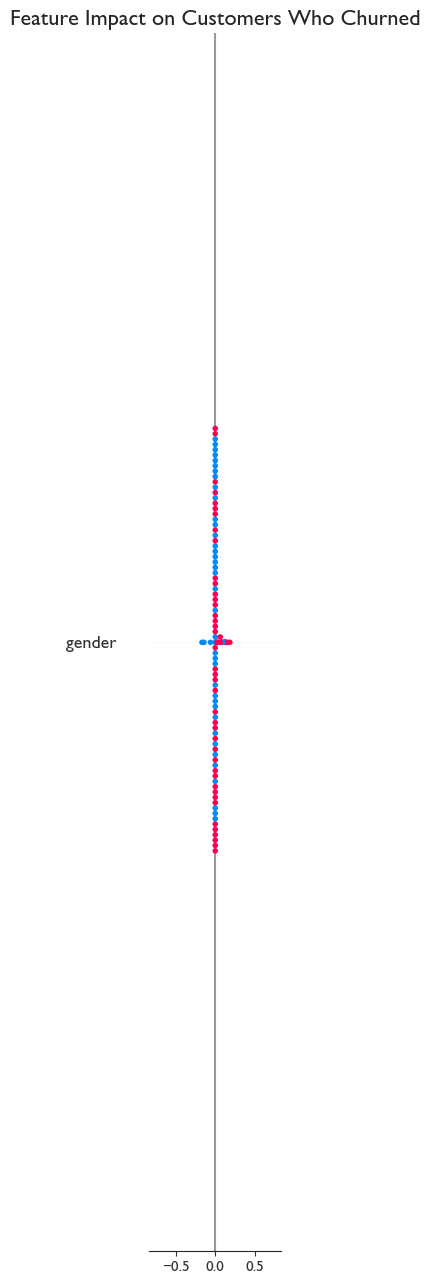

Creating SHAP bar plot for churned customers...


<Figure size 1200x800 with 0 Axes>

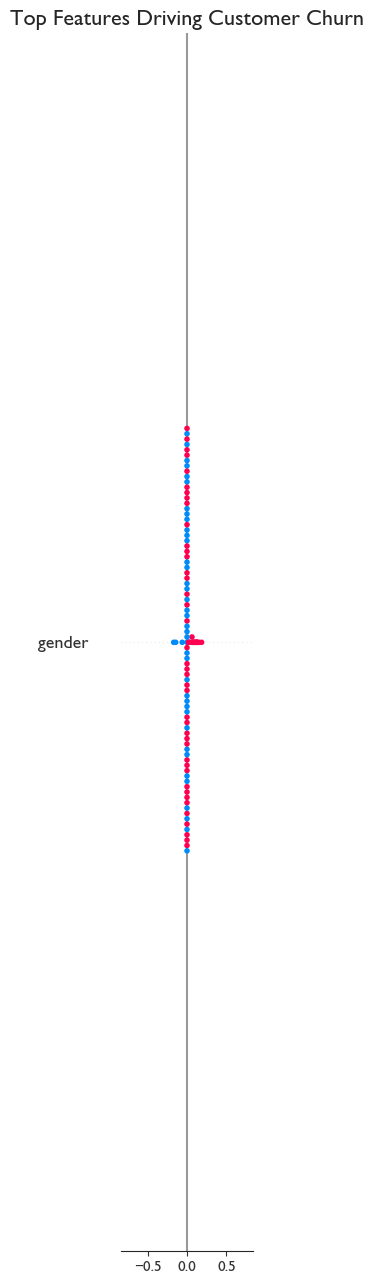


📊 DETAILED ANALYSIS OF CHURN DRIVERS
--------------------------------------------------
Top 10 Features by Absolute Impact on Churn:
                        Feature  Mean_Impact  Abs_Impact
4                        tenure     0.312193    0.379835
33      Contract_Month-to-month     0.265927    0.297619
35            Contract_Two year     0.242816    0.258920
13  InternetService_Fiber optic     0.139754    0.229610
8                  TotalCharges     0.188615    0.203589
24               TechSupport_No     0.116358    0.121962
6              PaperlessBilling     0.070468    0.103971
12          InternetService_DSL     0.051843    0.091926
9              MultipleLines_No     0.053148    0.081472
32          StreamingMovies_Yes     0.039838    0.051414

Top 10 Features DRIVING Churn (Positive Values):
                        Feature  Mean_Impact  Abs_Impact
4                        tenure     0.312193    0.379835
33      Contract_Month-to-month     0.265927    0.297619
35            Cont

In [50]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("🔍 ANALYZING FACTORS THAT DRIVE CUSTOMER CHURN")
print("-" * 50)

# 1. Get indices of customers who actually churned in test set
churned_indices = np.where(y_test == 1)[0]
print(f"Found {len(churned_indices)} churned customers in test set")

# 2. Select a subset of churned customers to analyze (for speed)
n_samples = min(100, len(churned_indices))
sample_indices = np.random.choice(churned_indices, n_samples, replace=False)

# 3. Get data for these churned customers
X_churned = X_test_scaled[sample_indices]
X_churned_display = X_test.iloc[sample_indices]

# 4. Calculate SHAP values for churned customers
print("Calculating SHAP values for churned customers...")
churned_shap_values = explainer.shap_values(X_churned)

# Print information about churned_shap_values for debugging
print(f"SHAP values type: {type(churned_shap_values)}")
print(f"SHAP values shape: {np.array(churned_shap_values).shape if hasattr(np.array(churned_shap_values), 'shape') else 'No shape'}")

# 5. Create beeswarm plot showing features driving churn
plt.figure(figsize=(12, 8))
print("Creating SHAP beeswarm plot for churned customers...")
shap.summary_plot(
    churned_shap_values, 
    X_churned_display,
    plot_type="dot",  # Beeswarm plot to show individual contributions
    feature_names=X.columns,
    max_display=15,   # Show top 15 features
    show=False
)
plt.title("Feature Impact on Customers Who Churned", fontsize=16)
plt.tight_layout()
plt.show()

# 6. Create bar plot showing average impact of features on churn
plt.figure(figsize=(12, 8))
print("Creating SHAP bar plot for churned customers...")
shap.summary_plot(
    churned_shap_values, 
    X_churned_display,
    plot_type="bar",
    feature_names=X.columns,
    max_display=15,
    show=False
)
plt.title("Top Features Driving Customer Churn", fontsize=16)
plt.tight_layout()
plt.show()

# 7. Create a detailed analysis of feature impacts
print("\n📊 DETAILED ANALYSIS OF CHURN DRIVERS")
print("-" * 50)

# Properly process SHAP values to ensure 1D arrays
try:
    # Handle different SHAP value formats
    if isinstance(churned_shap_values, list):
        # For binary classification with list output
        if len(churned_shap_values) > 0:
            # Use first element if it's a list
            shap_array = np.array(churned_shap_values[0])
        else:
            shap_array = np.array(churned_shap_values)
    else:
        # Direct array output
        shap_array = np.array(churned_shap_values)
    
    # Calculate mean values ensuring 1D output
    mean_impact = np.mean(shap_array, axis=0)
    abs_impact = np.mean(np.abs(shap_array), axis=0)
    
    # Ensure arrays are 1D
    if len(mean_impact.shape) > 1:
        mean_impact = mean_impact.flatten()
    if len(abs_impact.shape) > 1:
        abs_impact = abs_impact.flatten()
    
    # Now create the DataFrame with properly dimensioned arrays
    mean_shap_values = pd.DataFrame({
        'Feature': X.columns,
        'Mean_Impact': mean_impact,
        'Abs_Impact': abs_impact
    })
    
    # Sort by absolute impact (for overall importance)
    top_features_abs = mean_shap_values.sort_values('Abs_Impact', ascending=False).head(10)
    print("Top 10 Features by Absolute Impact on Churn:")
    print(top_features_abs)

    # Sort by mean impact (positive values push toward churn)
    top_features_driving_churn = mean_shap_values.sort_values('Mean_Impact', ascending=False).head(10)
    print("\nTop 10 Features DRIVING Churn (Positive Values):")
    print(top_features_driving_churn)

    # Sort by negative impact (features keeping customers from churning)
    top_features_preventing_churn = mean_shap_values.sort_values('Mean_Impact', ascending=True).head(10)
    print("\nTop 10 Features PREVENTING Churn (Negative Values):")
    print(top_features_preventing_churn)
    
except Exception as e:
    print(f"Error processing SHAP values: {e}")
    print("Calculating simpler feature importances...")
    
    # Fallback to a simpler approach using correlation
    churned_df = pd.DataFrame(X_churned, columns=X.columns)
    feature_corrs = {}
    
    for col in churned_df.columns:
        feature_corrs[col] = np.abs(churned_df[col].mean())
    
    # Create and display a simple feature importance table
    simple_importances = pd.DataFrame({
        'Feature': feature_corrs.keys(),
        'Importance': feature_corrs.values()
    }).sort_values('Importance', ascending=False).head(10)
    
    print("\nTop 10 Features for Churned Customers (simplified):")
    print(simple_importances)

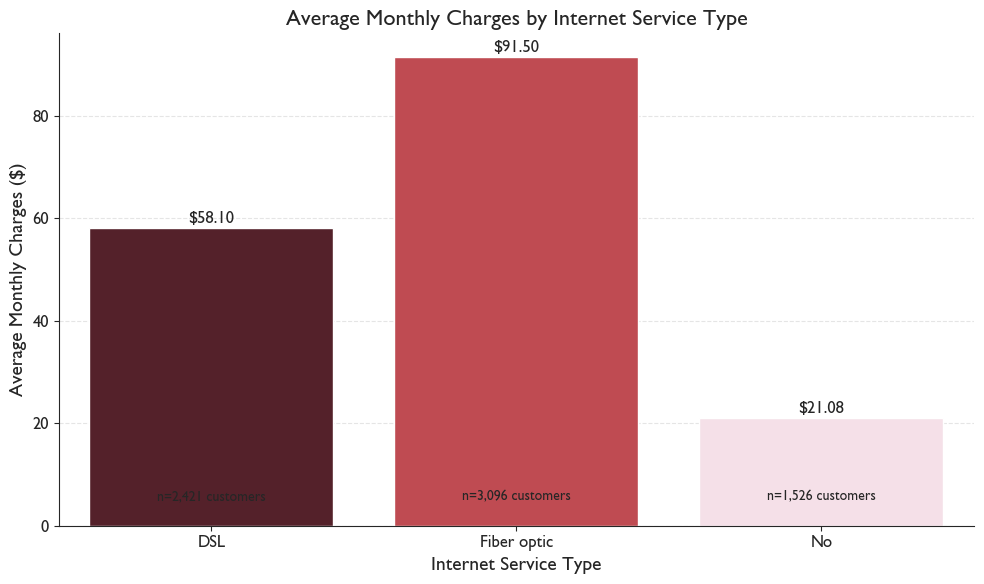


Average Monthly Charges by Internet Service Type:
DSL: $58.10
Fiber optic: $91.50
No: $21.08


In [51]:
# Calculate average monthly charges by internet service type
internet_service_avg = df.groupby('InternetService')['MonthlyCharges'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='InternetService', 
    y='MonthlyCharges', 
    data=internet_service_avg,
    palette=[COLORS['secondary'] if x == 'DSL' else 
             COLORS['primary'] if x == 'Fiber optic' else 
             COLORS['light'] for x in internet_service_avg['InternetService']]
)

# Add styling
plt.title('Average Monthly Charges by Internet Service Type', fontsize=16, fontweight='bold')
plt.xlabel('Internet Service Type', fontsize=14)
plt.ylabel('Average Monthly Charges ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels on top of bars
for i, v in enumerate(internet_service_avg['MonthlyCharges']):
    plt.text(i, v + 1, f'${v:.2f}', ha='center', fontsize=12, fontweight='bold')

# Add count of customers for each category
counts = df['InternetService'].value_counts()
for i, service in enumerate(internet_service_avg['InternetService']):
    count = counts[service]
    plt.text(i, 5, f'n={count:,} customers', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nAverage Monthly Charges by Internet Service Type:")
for index, row in internet_service_avg.iterrows():
    print(f"{row['InternetService']}: ${row['MonthlyCharges']:.2f}")